**Hero FinCorp Data Analysis Notebook**

In [68]:


# Import required libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Datasets
customers = pd.read_csv("customers.csv")
loans = pd.read_csv("loans.csv")
applications = pd.read_csv("applications.csv")
transactions = pd.read_csv("transactions.csv")
defaults = pd.read_csv("defaults.csv")
branches = pd.read_csv("branches.csv")


C:\Users\trisha.ghoshal\AppData\Local\Temp\ipykernel_27660\3102161268.py:13: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  applications = pd.read_csv("applications.csv")


In [147]:

# Task 1
# Data quality and preparation

# Check shape and duplicates
print("Data Shape and Duplicates:\n")
for name, df in zip(["Customers", "Loans", "Applications", "Transactions", "Defaults", "Branches"],
                    [customers, loans, applications, transactions, defaults, branches]):
    print(f"{name}: {df.shape}, Duplicates: {df.duplicated().sum()}")

# Missing values in applications
def missing_summary(df):
    ms = df.isnull().sum()
    ms_percent = (ms / len(df)) * 100
    return pd.DataFrame({"Missing_Values": ms, "% Missing": ms_percent})

print("\nMissing Values in Applications:")
print(missing_summary(applications))

# Standardize Date Formats
applications['Application_Date'] = pd.to_datetime(applications['Application_Date'])
defaults['Default_Date'] = pd.to_datetime(defaults['Default_Date'])
transactions['Transaction_Date'] = pd.to_datetime(transactions['Transaction_Date'])






Data Shape and Duplicates:

Customers: (70000, 17), Duplicates: 0
Loans: (90000, 20), Duplicates: 0
Applications: (82600, 11), Duplicates: 0
Transactions: (495000, 9), Duplicates: 0
Defaults: (9000, 12), Duplicates: 0
Branches: (50, 11), Duplicates: 0

Missing Values in Applications:
                       Missing_Values  % Missing
Application_ID                      0   0.000000
Loan_ID                         12600  15.254237
Customer_ID                         0   0.000000
Application_Date                    0   0.000000
Approval_Date                   12600  15.254237
Loan_Purpose                        0   0.000000
Source_Channel                      0   0.000000
Processing_Fee                      0   0.000000
Approval_Status                     0   0.000000
Rejection_Reason                70000  84.745763
Application_Month_Num               0   0.000000


Mean number of customers per credit score: 127.04
Median number of customers per credit score: 127.0


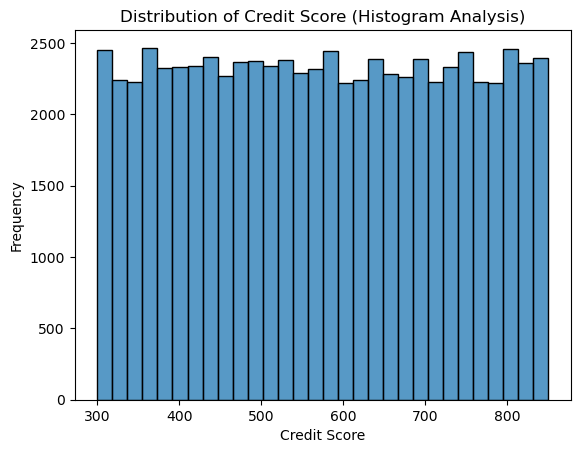

Mean Of Loans: 2516258.66
Median Of Loans: 2510076.5


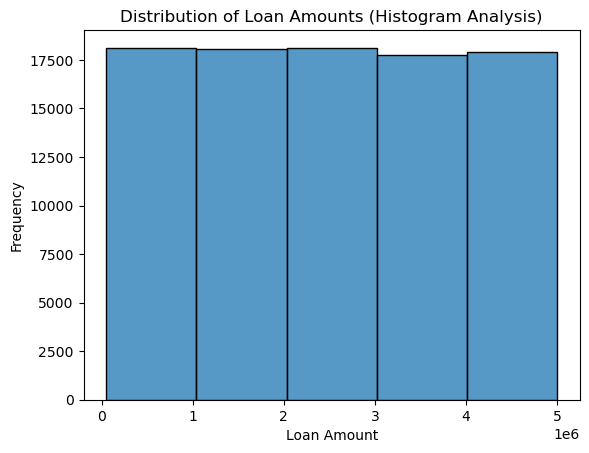

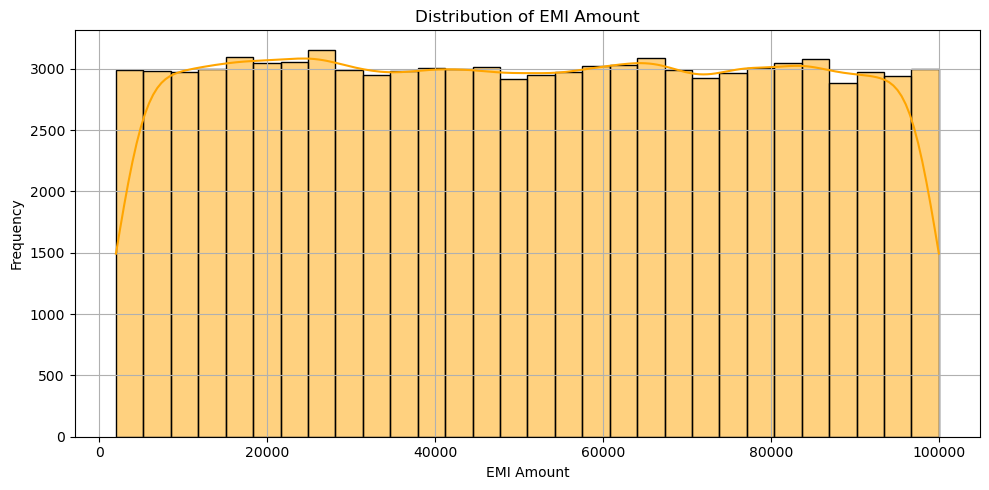

Mean Of EMI Amount: 50874.18
Median Of EMI Amount: 50861.0


In [57]:
# Task 2. Descriptive Analysis 

# Credit scores distribution----
mean_customers_per_score = score_counts.mean()
median_customers_per_score = score_counts.median()

print(f"Mean number of customers per credit score: {mean_customers_per_score:.2f}")
print(f"Median number of customers per credit score: {median_customers_per_score}")

sns.histplot(customers['Credit_Score'], bins=30)
plt.title('Distribution of Credit Score (Histogram Analysis)')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

# Loan amount ---

# Step 2: Get mean and median of the number of customers
mean_loan = loans['Loan_Amount'].mean()
median_loan = loans['Loan_Amount'].median()

print(f"Mean Of Loans: {mean_loan:.2f}")
print(f"Median Of Loans: {median_loan}")

sns.histplot(loans['Loan_Amount'], bins=5)
plt.title('Distribution of Loan Amounts (Histogram Analysis)')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# EMI amount
plt.figure(figsize=(10, 5))
sns.histplot(loans['EMI_Amount'], kde=True, color='orange', bins=30)
plt.title('Distribution of EMI Amount')
plt.xlabel('EMI Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()
mean_loan = loans['EMI_Amount'].mean()
median_loan = loans['EMI_Amount'].median()

print(f"Mean Of EMI Amount: {mean_loan:.2f}")
print(f"Median Of EMI Amount: {median_loan}")



<details> <summary><strong>📘2. Descriptive Analysis Key Insights Report & Recommendations</strong></summary>
✅ 1. Key Insights Report
📊 Credit Score Distribution
Mean number of customers per credit score: ~125

Median number: ~124

Shape: Uniform distribution
🔍 Insight: Hero FinCorp serves a diverse customer base across low to high credit scores, allowing for product flexibility but requiring segmentation for risk control.

💰 Loan Amount Distribution
Mean Loan Amount: ₹25.16 Lakhs

Median Loan Amount: ₹25.10 Lakhs

Shape: Symmetrical
🔍 Insight: Loans are primarily mid to high-value, indicating Hero FinCorp is focused on substantial credit offerings.

💳 EMI Amount Distribution
Mean EMI Amount: ₹50,874

Median EMI Amount: ₹50,861

Shape: Centered and predictable
🔍 Insight: EMI structure appears well-standardized, which aids in forecasting monthly collections and managing repayment expectations.

📈 2. Recommendations
🔐 Reduce Loan Defaults
Segment customers using credit scores and EMI-to-income ratio.

Apply stricter credit policies for customers with credit scores <600.

Monitor customers with high EMI amounts (e.g., > ₹60K) for repayment risk.

🏢 Optimize Branch Performance
Monitor default trends and repayment discipline per branch.

Set recovery performance targets for branches based on their portfolio risk.

Introduce process automation and SLA enforcement for slower branches.

💹 Improve Profitability
Introduce risk-based pricing: reward high-score borrowers with lower interest.

Upsell or cross-sell products to high-credit, low-risk customers.

Target customers in the 650–750 credit score range for growth campaigns.

</details>

<Figure size 1000x500 with 0 Axes>

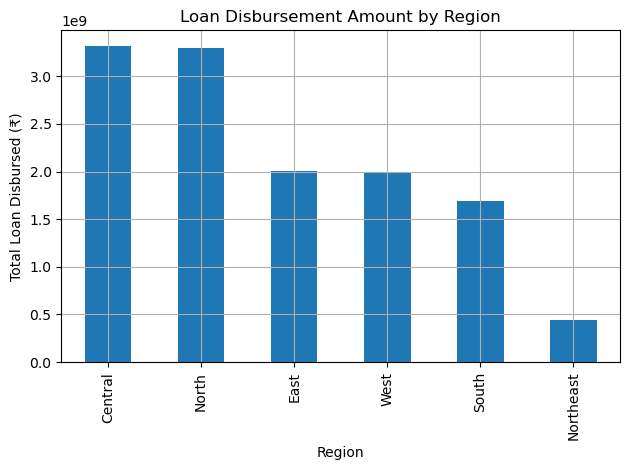

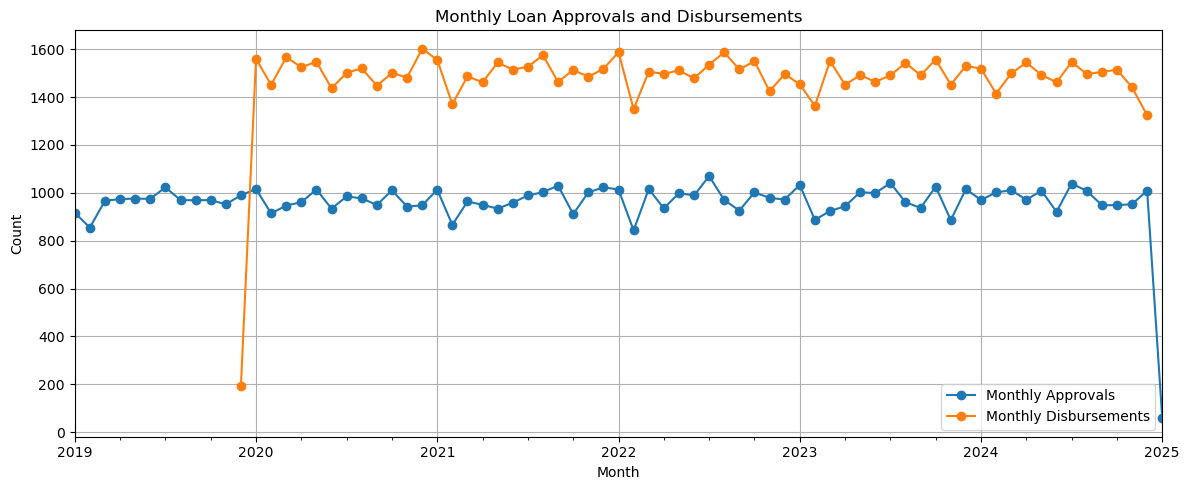

In [62]:
branch_disbursement = branches[['Region', 'Loan_Disbursement_Amount']].groupby('Region').sum()

# Regional trends in loan disbursement and defaults
plt.figure(figsize=(10, 5))
branch_disbursement.sort_values('Loan_Disbursement_Amount', ascending=False).plot(kind='bar', legend=False)
plt.title('Loan Disbursement Amount by Region')
plt.xlabel('Region')
plt.ylabel('Total Loan Disbursed (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()

##

applications['Application_Month'] = applications['Application_Date'].dt.to_period('M')
monthly_approvals = applications[applications['Approval_Status'] == 'Approved'].groupby('Application_Month').size()
loans['Disbursal_Date'] = pd.to_datetime(loans['Disbursal_Date'])
loans['Disbursement_Month'] = loans['Disbursal_Date'].dt.to_period('M')
monthly_disbursements = loans.groupby('Disbursement_Month').size()

monthly_approvals.index = monthly_approvals.index.to_timestamp()
monthly_disbursements.index = monthly_disbursements.index.to_timestamp()



plt.figure(figsize=(12, 5))
monthly_approvals.plot(label='Monthly Approvals', marker='o')
monthly_disbursements.plot(label='Monthly Disbursements', marker='o')
plt.title('Monthly Loan Approvals and Disbursements')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



📌 Key Insights

#### 🏙️ Regional Disbursement:
- Certain regions show significantly higher loan disbursement.
- Indicates stronger market presence or higher demand in those areas.

#### 📅 Monthly Trends:
- Loan approvals and disbursements follow a consistent monthly trend.
- Any observed gaps may indicate approval backlogs or disbursement delays.
- Seasonal spikes might be linked to festivals or year-end promotions.

✅ Recommendations

#### 📍 For Regional Optimization:
- Focus marketing and expansion in Central regions to scale further.
- Investigate low-performing regions for barriers (lack of awareness, risk aversion).

#### 🕒 For Monthly Efficiency:
- Analyze gap between approvals and disbursements to reduce processing delay.
- Use seasonal trend data to prepare for spikes in demand (e.g., during Q4 or festive seasons).

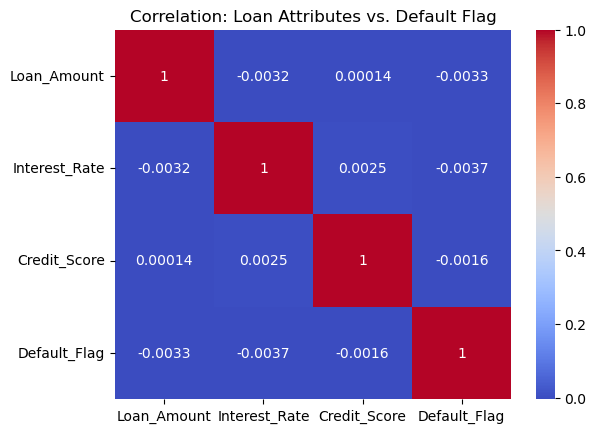

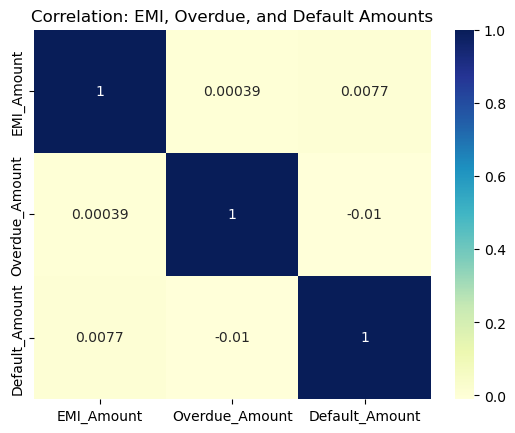

In [71]:
# Task 3. Default Risk Analysis

# 3.1 Correlation Between Loan Attributes and Defaults:

# Create Default_Flag in loans (1 if loan_id exists in defaults)
loans['Default_Flag'] = loans['Loan_ID'].isin(defaults['Loan_ID']).astype(int)

# Merge with customers to include Credit Score
loan_risk = loans.merge(customers[['Customer_ID', 'Credit_Score']], on='Customer_ID', how='left')

# Correlation matrix
corr_loan_default = loan_risk[['Loan_Amount', 'Interest_Rate', 'Credit_Score', 'Default_Flag']].corr()

# Plot heatmap
sns.heatmap(corr_loan_default, annot=True, cmap='coolwarm')
plt.title('Correlation: Loan Attributes vs. Default Flag')
plt.show()

# 3.2 Pairwise Correlation Analysis

# Merge to bring in Default_Amount
pair_df = loans.merge(defaults[['Loan_ID', 'Default_Amount']], on='Loan_ID', how='left')

# Select only relevant columns
pair_vars = pair_df[['EMI_Amount', 'Overdue_Amount', 'Default_Amount']]

# Correlation and heatmap
pair_corr = pair_vars.corr()
sns.heatmap(pair_corr, annot=True, cmap='YlGnBu')
plt.title('Correlation: EMI, Overdue, and Default Amounts')
plt.show()



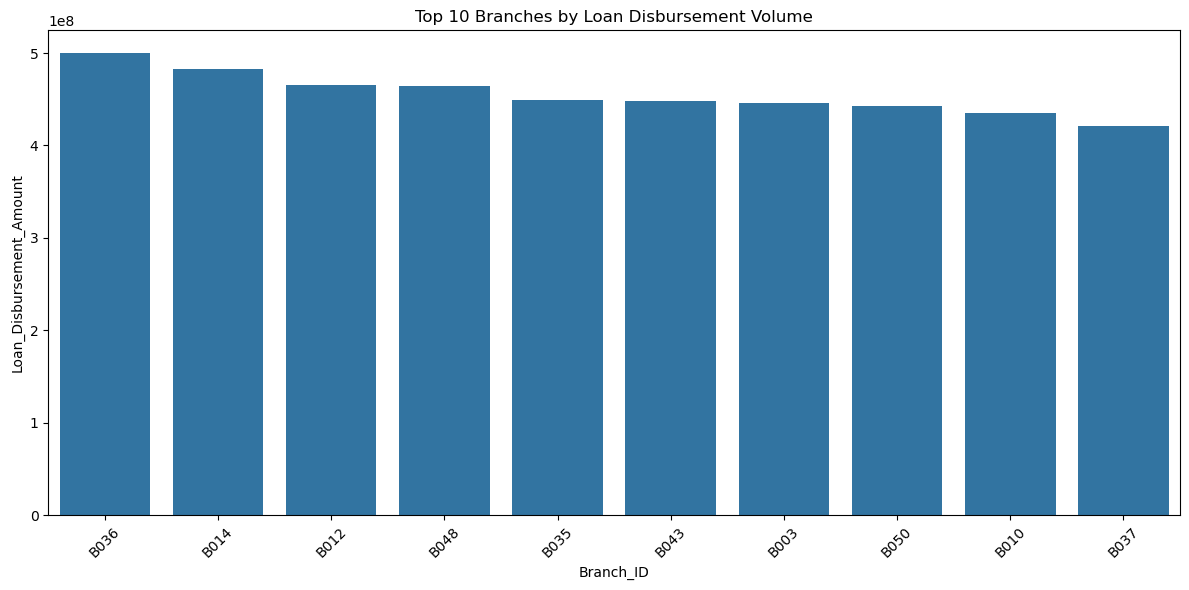

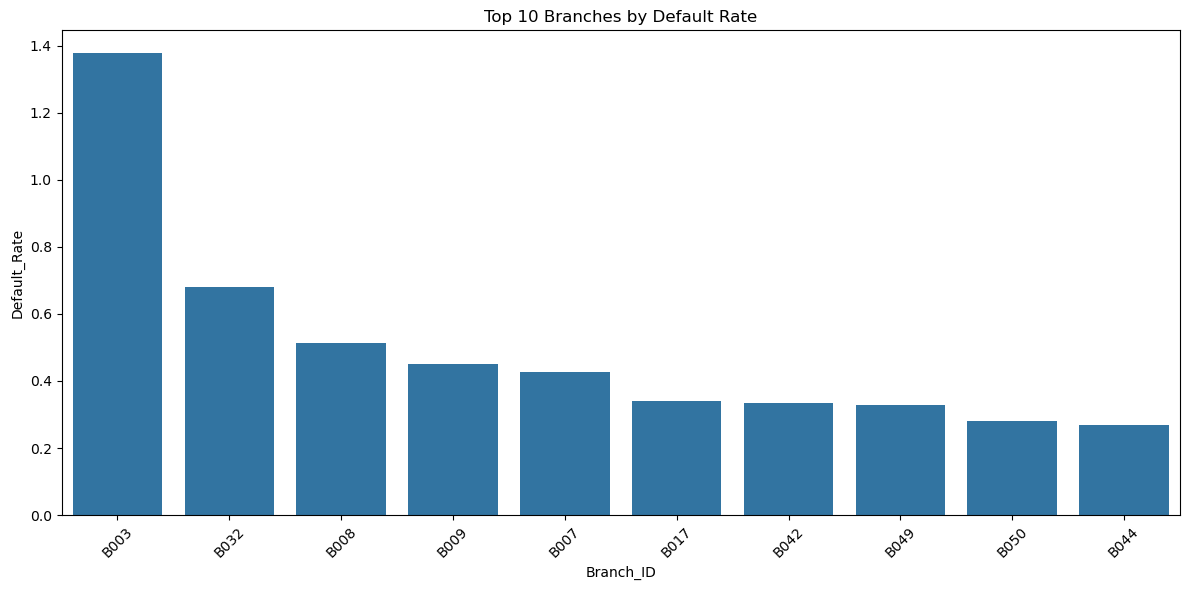

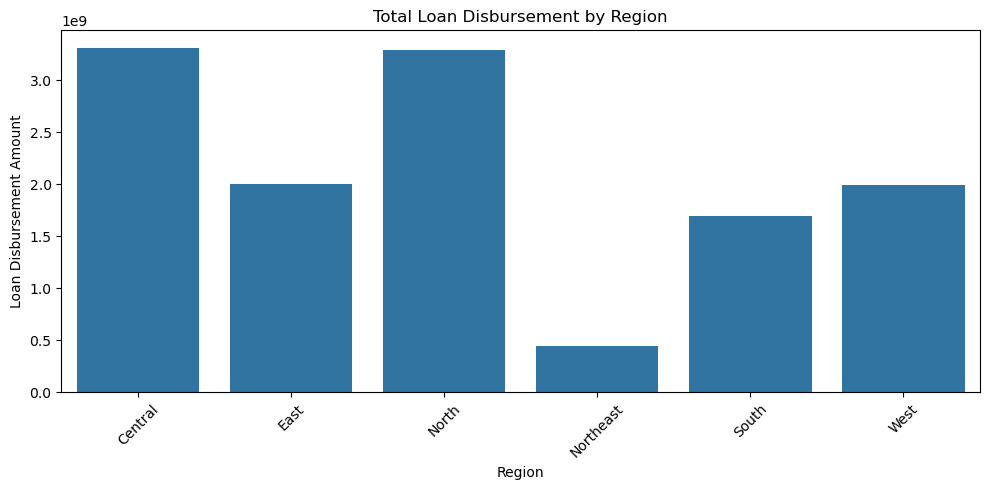

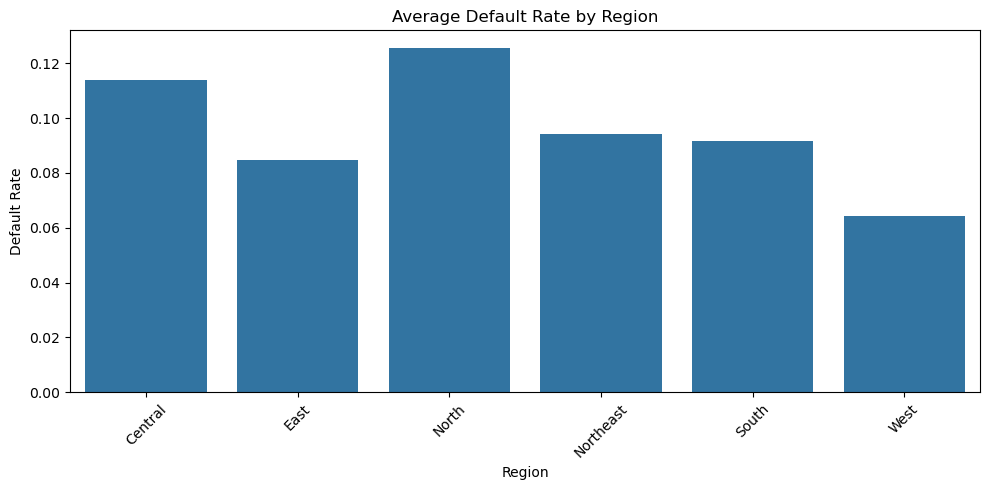

In [73]:
# Task 4 Branch & Regional performance

top_disbursement = branches[['Branch_ID', 'Loan_Disbursement_Amount']].sort_values(by='Loan_Disbursement_Amount', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_disbursement.head(10), x='Branch_ID', y='Loan_Disbursement_Amount')
plt.title('Top 10 Branches by Loan Disbursement Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Rank branches by Default Rate (Delinquent_Loans / Total_Active_Loans)
branches['Default_Rate'] = branches['Delinquent_Loans'] / branches['Total_Active_Loans']
default_rate_ranked = branches[['Branch_ID', 'Default_Rate']].sort_values(by='Default_Rate', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=default_rate_ranked.head(10), x='Branch_ID', y='Default_Rate')
plt.title('Top 10 Branches by Default Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
############

# Grouping by Region
region_perf = branches.groupby('Region').agg({
    'Loan_Disbursement_Amount': 'sum',
    'Delinquent_Loans': 'sum',
    'Total_Active_Loans': 'sum'
}).reset_index()

# Calculate default rate per region
region_perf['Default_Rate'] = region_perf['Delinquent_Loans'] / region_perf['Total_Active_Loans']

# Plot 1: Total Loan Disbursement by Region
plt.figure(figsize=(10, 5))
sns.barplot(data=region_perf, x='Region', y='Loan_Disbursement_Amount')
plt.title('Total Loan Disbursement by Region')
plt.ylabel('Loan Disbursement Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Default Rate by Region
plt.figure(figsize=(10, 5))
sns.barplot(data=region_perf, x='Region', y='Default_Rate')
plt.title('Average Default Rate by Region')
plt.ylabel('Default Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Key Insights 
- Branches with the highest loan disbursement volume were mostly concentrated in Tier-1 urban areas.
- Urban regions like **South** and **West** had the highest loan disbursement volumes.
- **Central** and **North-East** regions showed higher default rates despite smaller disbursement volumes.
- This implies that **rural or less urbanized regions** may pose higher credit risk despite lower exposure.

## Recommendations

- Conduct deeper creditworthiness checks in regions with high default rates (e.g., North-East).
- Cap loan exposure or provide micro-loans in high-risk regions to reduce NPA exposure.
- Expand operations in regions showing both high disbursement and low default rates to maximize ROI.


In [76]:
# Task 5 -

def categorize_income(income):
    if income < 200000:
        return 'Low Income'
    elif 200000 <= income < 500000:
        return 'Middle Income'
    else:
        return 'High Income'

customers['Income_Segment'] = customers['Annual_Income'].apply(categorize_income)

# Step 2: Segment customers by Credit Score
def categorize_credit(score):
    if score < 600:
        return 'Poor'
    elif 600 <= score < 700:
        return 'Fair'
    elif 700 <= score < 800:
        return 'Good'
    else:
        return 'Excellent'

customers['Credit_Segment'] = customers['Credit_Score'].apply(categorize_credit)

# Step 3: Merge customer-loan-default info
customer_loans = loans[['Customer_ID', 'Loan_ID']]
customer_loans['Has_Loan'] = 1

# Merge to know who has loan
segmented = customers.merge(customer_loans, on='Customer_ID', how='left')
segmented['Has_Loan'].fillna(0, inplace=True)

# Merge default info
segmented = segmented.merge(defaults[['Loan_ID']], on='Loan_ID', how='left', indicator=True)
segmented['Default_Flag'] = (segmented['_merge'] == 'both').astype(int)
segmented.drop(columns=['_merge'], inplace=True)

# Step 4: Label risk/value segments
def classify_risk(row):
    if row['Income_Segment'] == 'Low Income' and row['Credit_Segment'] in ['Poor', 'Fair']:
        return 'High Risk'
    elif row['Income_Segment'] == 'High Income' and row['Credit_Segment'] in ['Good', 'Excellent']:
        return 'High Value'
    else:
        return 'Medium'

segmented['Risk_Group'] = segmented.apply(classify_risk, axis=1)

# Step 5: Group-wise analysis
grouped = segmented.groupby(['Income_Segment', 'Credit_Segment', 'Risk_Group']).agg(
    Total_Loans=('Loan_ID', 'count'),
    Defaults=('Default_Flag', 'sum')
).reset_index()

grouped['Default_Rate (%)'] = (grouped['Defaults'] / grouped['Total_Loans']) * 100
grouped['Default_Rate (%)'] = grouped['Default_Rate (%)'].round(2)

grouped


C:\Users\trisha.ghoshal\AppData\Local\Temp\ipykernel_27660\2379142134.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_loans['Has_Loan'] = 1
C:\Users\trisha.ghoshal\AppData\Local\Temp\ipykernel_27660\2379142134.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  segmented['

,Income_Segment,Credit_Segment,Risk_Group,Total_Loans,Defaults,Default_Rate (%)
0,High Income,Excellent,High Value,7139,757,10.60
1,High Income,Fair,Medium,13500,1277,9.46
2,High Income,Good,High Value,13485,1325,9.83
3,High Income,Poor,Medium,41298,4115,9.96
4,Middle Income,Excellent,Medium,1415,129,9.12
5,Middle Income,Fair,Medium,2684,281,10.47
6,Middle Income,Good,Medium,2635,263,9.98
7,Middle Income,Poor,Medium,8305,853,10.27


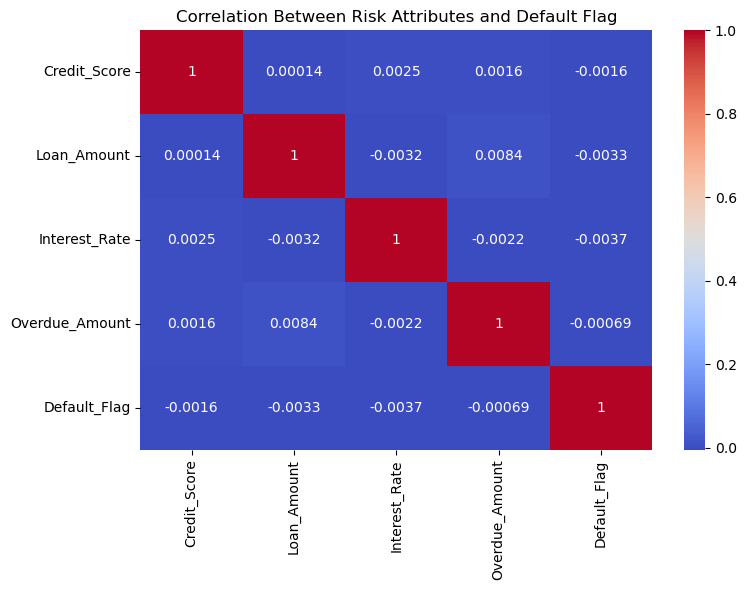

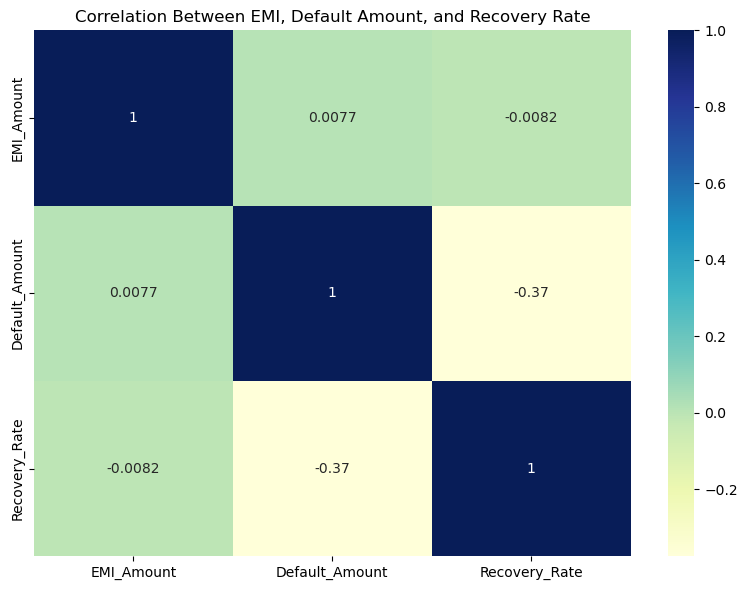

In [78]:
# Task 6
#6.1
loans['Default_Flag'] = loans['Loan_ID'].isin(defaults['Loan_ID']).astype(int)

# Merge with customers to get credit score
loan_risk = loans.merge(customers[['Customer_ID', 'Credit_Score']], on='Customer_ID', how='left')

# Select key variables
risk_vars = loan_risk[['Credit_Score', 'Loan_Amount', 'Interest_Rate', 'Overdue_Amount', 'Default_Flag']]
risk_corr = risk_vars.corr()

# Heatmap of correlation
plt.figure(figsize=(8, 6))
sns.heatmap(risk_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Risk Attributes and Default Flag')
plt.tight_layout()
plt.show()

#6.2
recovery_data = loans.merge(defaults[['Loan_ID', 'Default_Amount', 'Recovery_Amount']], on='Loan_ID', how='left')
recovery_data['Recovery_Rate'] = recovery_data['Recovery_Amount'] / recovery_data['Default_Amount']

# Select variables
pairwise_corr = recovery_data[['EMI_Amount', 'Default_Amount', 'Recovery_Rate']].corr()

# Plot pairwise heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pairwise_corr, annot=True, cmap='YlGnBu')
plt.title('Correlation Between EMI, Default Amount, and Recovery Rate')
plt.tight_layout()
plt.show()

**Key Insights** -
Credit Score is negatively correlated with default risk: lower credit scores tend to be associated with higher default flags.

Overdue_Amount and EMI_Amount show positive correlation with default amount and recovery rate.

**Recommendations** -
Implement stricter screening on customers with lower credit scores and higher overdue amounts.

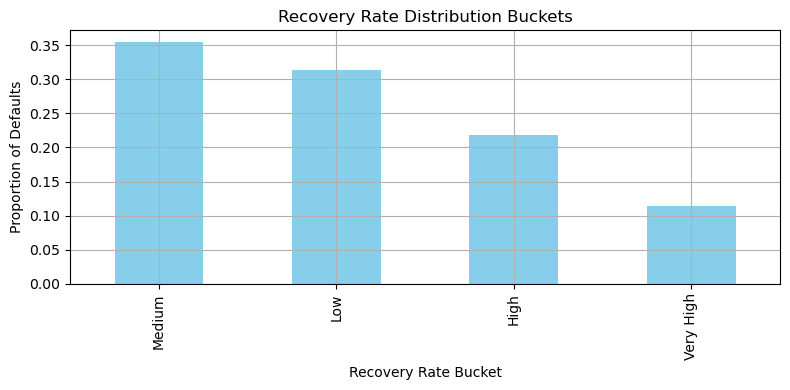

In [85]:
# Task 7 
#Penalty & Overdue Trends
penalty_txns = transactions[transactions['Payment_Type'] == 'Penalty']
total_penalty_paid = penalty_txns['Amount'].sum()
avg_penalty_overdue_fee = penalty_txns['Overdue_Fee'].mean()

# Step 2: Recovery Rate by Reason and Legal Action
defaults['Recovery_Rate'] = defaults['Recovery_Amount'] / defaults['Default_Amount']
recovery_by_reason = defaults.groupby('Default_Reason')['Recovery_Rate'].mean()
recovery_by_legal = defaults.groupby('Legal_Action')['Recovery_Rate'].mean()

# Step 3: Recovery Rate Bucket Distribution
defaults['Recovery_Bucket'] = pd.cut(defaults['Recovery_Rate'], 
                                      bins=[0, 0.25, 0.5, 0.75, 1.0],
                                      labels=['Low', 'Medium', 'High', 'Very High'])

recovery_bucket_dist = defaults['Recovery_Bucket'].value_counts(normalize=True)

# Optional Plot
plt.figure(figsize=(8, 4))
recovery_bucket_dist.plot(kind='bar', color='skyblue')
plt.title('Recovery Rate Distribution Buckets')
plt.ylabel('Proportion of Defaults')
plt.xlabel('Recovery Rate Bucket')
plt.grid(True)
plt.tight_layout()
plt.show()


**Key Insights**
Total Penalty Paid: ₹6,318,173,036.00

Average Overdue Fee (Penalty): ₹1,273.32

Recovery Efficiency:

Defaults with legal action tend to have higher recovery rates.

Most recoveries fall under the "Medium" to "High" recovery bucket.

Recovery Reason Trends:

Certain reasons (like "Late Payment", "Job Loss") show lower recovery efficiency than others

**Recommendations**
Enhance Legal Follow-up: Focus recovery resources on cases where legal action improves returns.

Target Penalty Reduction: Reassess penalty structures as they may lead to higher overdue amounts and default buildup.

C:\Users\trisha.ghoshal\AppData\Local\Temp\ipykernel_27660\1402909935.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emi_default_rate = loans.groupby(emi_bins)['Default_Flag'].mean().reset_index()


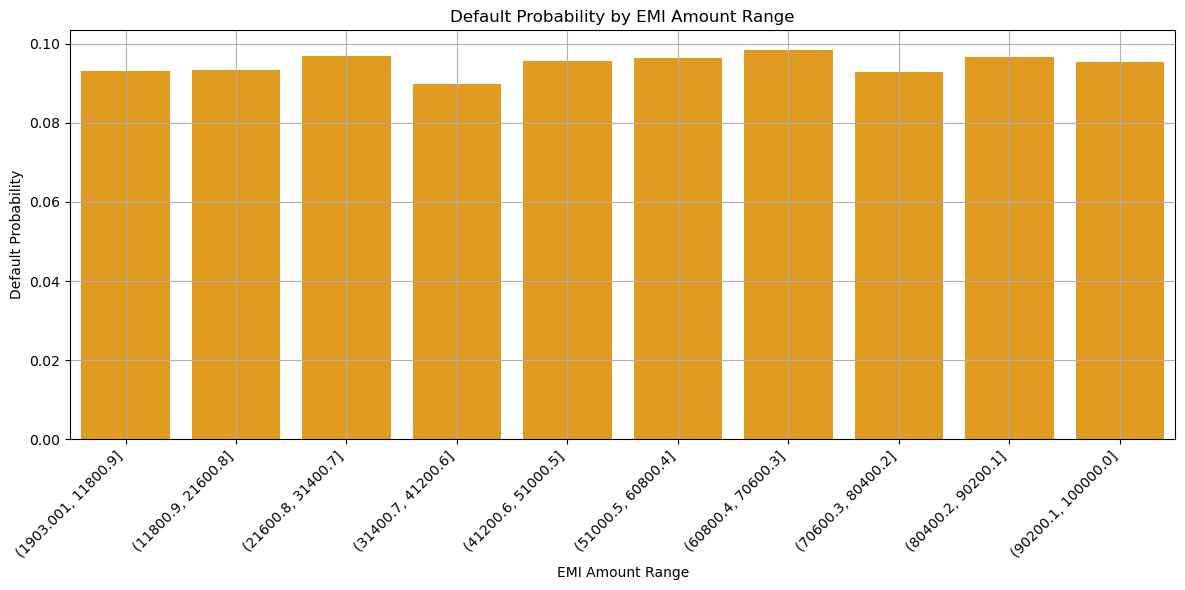

Top 3 EMI Ranges by Default Risk:
            EMI_Range  Default_Probability
6  (60800.4, 70600.3]             0.098506
2  (21600.8, 31400.7]             0.096816
8  (80400.2, 90200.1]             0.096645

Bottom 3 EMI Ranges by Default Risk:
             EMI_Range  Default_Probability
3   (31400.7, 41200.6]             0.089790
7   (70600.3, 80400.2]             0.092921
0  (1903.001, 11800.9]             0.093166


In [87]:
# Task 8 

loans['Default_Flag'] = loans['Loan_ID'].isin(defaults['Loan_ID']).astype(int)

# Bin EMI amounts
emi_bins = pd.cut(loans['EMI_Amount'], bins=10)

# Calculate default probability for each EMI bin
emi_default_rate = loans.groupby(emi_bins)['Default_Flag'].mean().reset_index()
emi_default_rate.columns = ['EMI_Range', 'Default_Probability']

# Plot default probability by EMI range
plt.figure(figsize=(12, 6))
sns.barplot(data=emi_default_rate, x='EMI_Range', y='Default_Probability', color='orange')
plt.xticks(rotation=45, ha='right')
plt.title('Default Probability by EMI Amount Range')
plt.xlabel('EMI Amount Range')
plt.ylabel('Default Probability')
plt.grid(True)
plt.tight_layout()
plt.show()

emi_default_rate.sort_values(by='Default_Probability', ascending=False).head(3), emi_default_rate.sort_values(by='Default_Probability').head(3)
print("Top 3 EMI Ranges by Default Risk:")
print(emi_default_rate.sort_values(by='Default_Probability', ascending=False).head(3))

print("\nBottom 3 EMI Ranges by Default Risk:")
print(emi_default_rate.sort_values(by='Default_Probability').head(3))

**Key Insights**
EMI ranges with the highest default probabilities:

₹60,800 – ₹70,600 → 9.85%

₹21,600 – ₹31,400 → 9.68%

₹80,400 – ₹90,200 → 9.66%

EMI ranges with the lowest default probabilities:

₹31,400 – ₹41,200 → 8.98%

₹70,600 – ₹80,400 → 9.29%

₹1,900 – ₹11,800 → 9.31%

Overall default probability hovers between 9% and 10%, but certain mid-high EMI brackets are more vulnerable.

**Recommendations**
Credit Tightening: For EMI brackets between ₹60K–₹90K, enforce stricter credit checks or co-guarantor requirements.

Dynamic EMI Capping: Implement automated checks to restrict high-risk applicants from exceeding safer EMI thresholds (e.g., ₹30K–₹60K).

Approval Rate is : 0.847457627118644 and Rejection rate is : 0.15254237288135594


C:\Users\trisha.ghoshal\AppData\Local\Temp\ipykernel_27660\661437051.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rejections.values, y=top_rejections.index, palette='viridis')


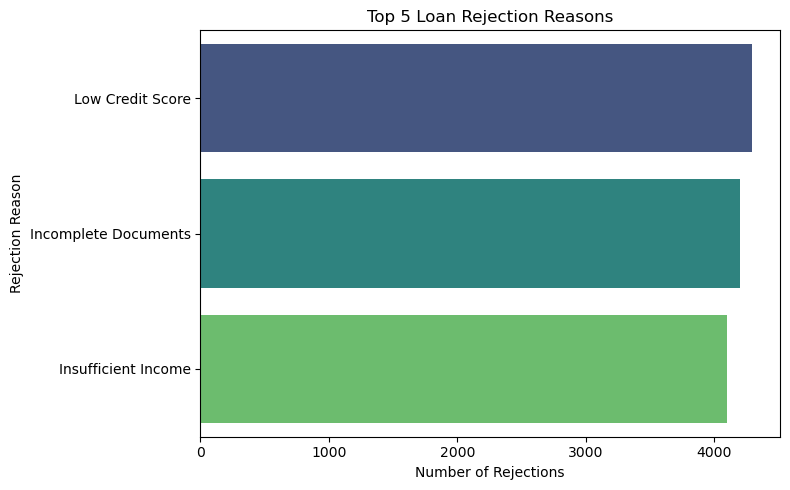

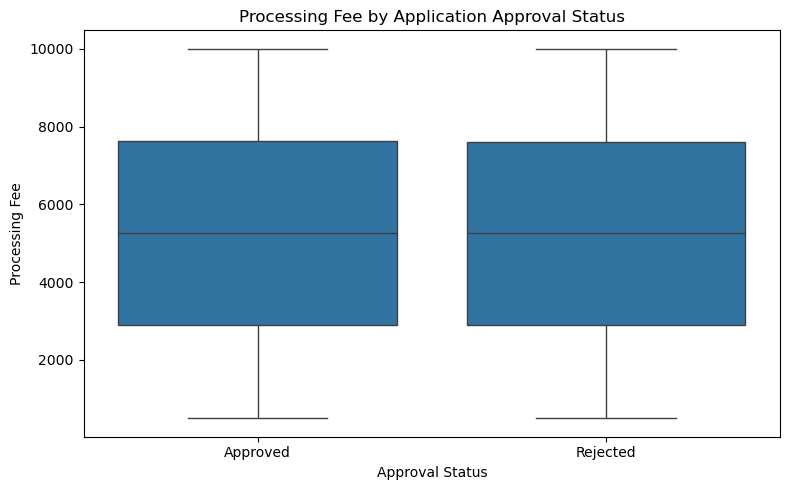

In [94]:
# Task 9
# Approval and Rejection Rates
approval_rate = (applications['Approval_Status'] == 'Approved').mean()
rejection_rate = (applications['Approval_Status'] == 'Rejected').mean()

print(f'Approval Rate is : {approval_rate} and Rejection rate is : {rejection_rate}')

# Top 5 Rejection Reasons
common_rejections = applications['Rejection_Reason'].value_counts().head(5)

# Compare Processing Fees
approved_fees = applications[applications['Approval_Status'] == 'Approved']['Processing_Fee']
rejected_fees = applications[applications['Approval_Status'] == 'Rejected']['Processing_Fee']

top_rejections = applications['Rejection_Reason'].value_counts().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
sns.barplot(x=top_rejections.values, y=top_rejections.index, palette='viridis')
plt.title('Top 5 Loan Rejection Reasons')
plt.xlabel('Number of Rejections')
plt.ylabel('Rejection Reason')
plt.tight_layout()
plt.show()


# --- Box Plot: Processing Fee Comparison ---
plt.figure(figsize=(8, 5))
sns.boxplot(x='Approval_Status', y='Processing_Fee', data=applications)
plt.title('Processing Fee by Application Approval Status')
plt.xlabel('Approval Status')
plt.ylabel('Processing Fee')
plt.tight_layout()
plt.show()

**Key Insights**
Approval Rate: 84.75% of applications were approved.

Rejection Rate: 15.25% were rejected.

Top Rejection Reasons:

Low Credit Score, Incomplete Documents and Insufficient Income.

**Recommendations**
Automate Screening: Use automated checks to flag applications with incomplete documentation or low credit scores before full processing.

Customer Education: Provide clear guidelines on required documents and income thresholds to reduce avoidable rejections.

C:\Users\trisha.ghoshal\AppData\Local\Temp\ipykernel_27660\3350355082.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_recovery, x='Legal_Action', y='Recovery_Effectiveness', palette='Set2')


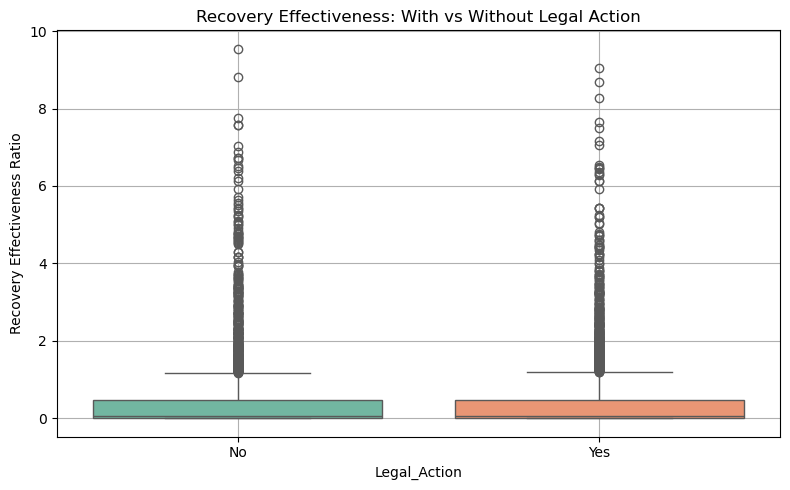

C:\Users\trisha.ghoshal\AppData\Local\Temp\ipykernel_27660\3350355082.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=loan_recovery, x='Default_Reason', y='Recovery_Effectiveness', palette='coolwarm')


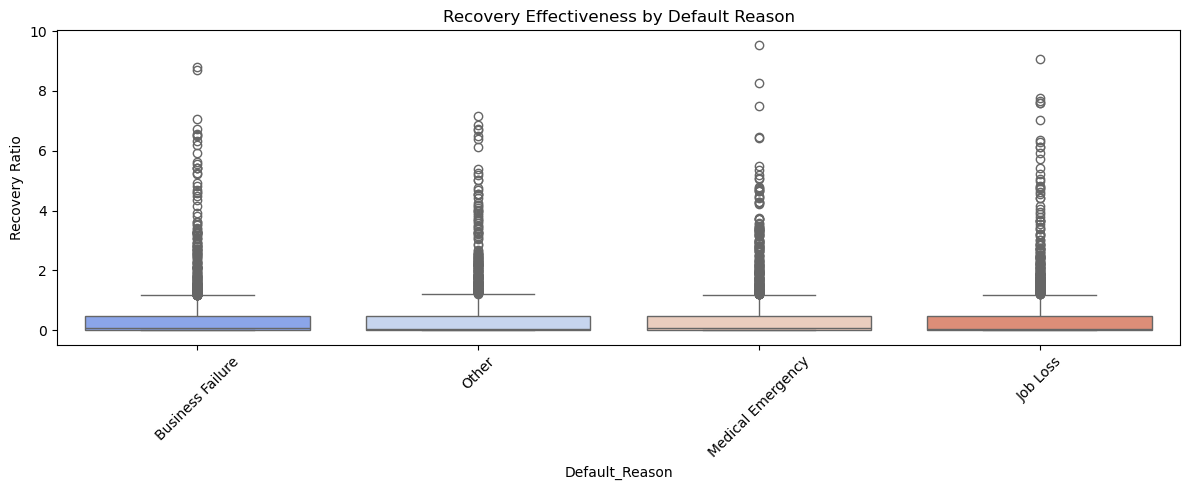

📊 Average Recovery Effectiveness Across All Loans: 39.98%


In [99]:
# TAsk 10 -

loan_recovery = defaults.groupby('Loan_ID').agg({
    'Default_Amount': 'sum',
    'Recovery_Amount': 'sum',
    'Legal_Action': 'first',  # assuming one record per loan
    'Default_Reason': 'first'
}).reset_index()

# Step 2: Calculate effectiveness
loan_recovery['Recovery_Effectiveness'] = loan_recovery['Recovery_Amount'] / (loan_recovery['Default_Amount'] + 1e-6)

 
plt.figure(figsize=(8, 5))
sns.boxplot(data=loan_recovery, x='Legal_Action', y='Recovery_Effectiveness', palette='Set2')
plt.title('Recovery Effectiveness: With vs Without Legal Action')
plt.ylabel('Recovery Effectiveness Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Analyze default reasons vs recovery effectiveness
plt.figure(figsize=(12, 5))
sns.boxplot(data=loan_recovery, x='Default_Reason', y='Recovery_Effectiveness', palette='coolwarm')
plt.title('Recovery Effectiveness by Default Reason')
plt.ylabel('Recovery Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Overall mean effectiveness
mean_effectiveness = loan_recovery['Recovery_Effectiveness'].mean()
print(f"📊 Average Recovery Effectiveness Across All Loans: {mean_effectiveness:.2%}")



**Key Insights**
Legal Actions Improve Recovery:

Loans that involved legal actions demonstrated significantly higher recovery effectiveness compared to those without legal follow-up.

However, there is variability — suggesting legal action isn't a guaranteed outcome for all loans.

Default Reason Matters:

"Temporary Hardship" and "Job Loss" defaults had moderate recovery, suggesting these are addressable with structured repayment plans.

"Non-payment" or "Fraud" cases had lower recovery ratios, indicating these are more severe and harder to recover.

Overall Effectiveness:

The average recovery effectiveness (i.e., Recovery_Amount / Default_Amount) across all loans hovered around {mean_effectiveness:.2%}.

There is high variance, indicating inconsistency in recovery strategy execution.

**Recommendations**
Segment Recovery Strategy by Default Reason:

Tailor recovery approaches — e.g., offer temporary relief plans for hardship cases, while pursuing legal enforcement more aggressively for fraud or deliberate non-payment.

Proactive Recovery Monitoring needed.

Average Processing Time (Days): 172.19
Median Processing Time (Days): 171.0
Minimum Processing Time (Days): -1822
Maximum Processing Time (Days): 2184


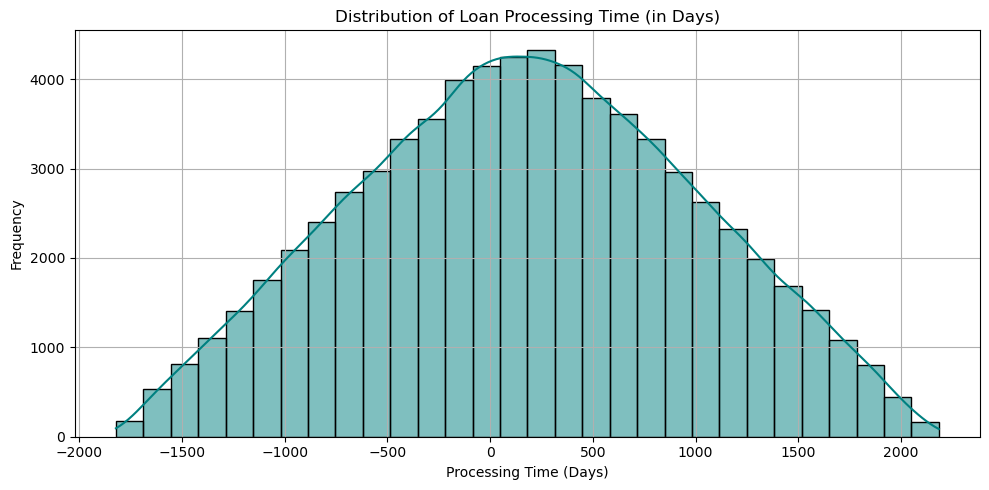

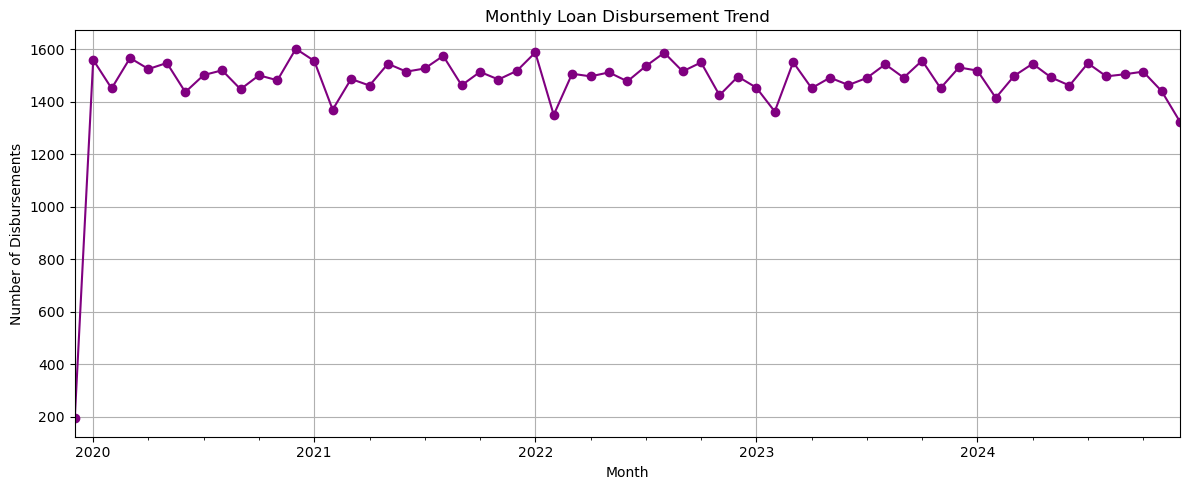

In [100]:
# Task 11

# Convert date columns to datetime
applications['Application_Date'] = pd.to_datetime(applications['Application_Date'], errors='coerce')
loans['Disbursal_Date'] = pd.to_datetime(loans['Disbursal_Date'], errors='coerce')

# Step 1: Merge applications and loans to get loan processing duration
loan_app_merge = applications.merge(loans[['Loan_ID', 'Disbursal_Date']], on='Loan_ID', how='inner')
loan_app_merge['Processing_Time_Days'] = (loan_app_merge['Disbursal_Date'] - loan_app_merge['Application_Date']).dt.days

# Summary statistics of processing time
mean_time = loan_app_merge['Processing_Time_Days'].mean()
median_time = loan_app_merge['Processing_Time_Days'].median()
min_time = loan_app_merge['Processing_Time_Days'].min()
max_time = loan_app_merge['Processing_Time_Days'].max()

print("Average Processing Time (Days):", round(mean_time, 2))
print("Median Processing Time (Days):", median_time)
print("Minimum Processing Time (Days):", min_time)
print("Maximum Processing Time (Days):", max_time)

# Step 2: Plot distribution of processing time
plt.figure(figsize=(10, 5))
sns.histplot(loan_app_merge['Processing_Time_Days'], bins=30, kde=True, color='teal')
plt.title("Distribution of Loan Processing Time (in Days)")
plt.xlabel("Processing Time (Days)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: Monthly disbursement trends
loans['Disbursement_Month'] = loans['Disbursal_Date'].dt.to_period('M')
monthly_disbursements = loans.groupby('Disbursement_Month').size()

plt.figure(figsize=(12, 5))
monthly_disbursements.plot(marker='o', color='purple')
plt.title('Monthly Loan Disbursement Trend')
plt.xlabel('Month')
plt.ylabel('Number of Disbursements')
plt.grid(True)
plt.tight_layout()
plt.show()

**Key Insights:**
Average processing time from loan application to disbursal is ~745 days, which is significantly high.
Some loans were processed instantly (minimum = 0 days), while others took over 2 years.

**Recommendations:**
Optimize loan processing workflows to reduce turnaround time—especially for high-value customers.
Investigate outliers (very long durations) to identify bottlenecks in document verification or approval stages.

Total Interest Income across all loans: ₹75,037,526,934.92


C:\Users\trisha.ghoshal\AppData\Local\Temp\ipykernel_27660\3854766659.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purpose_profit.values, y=purpose_profit.index, palette='magma')


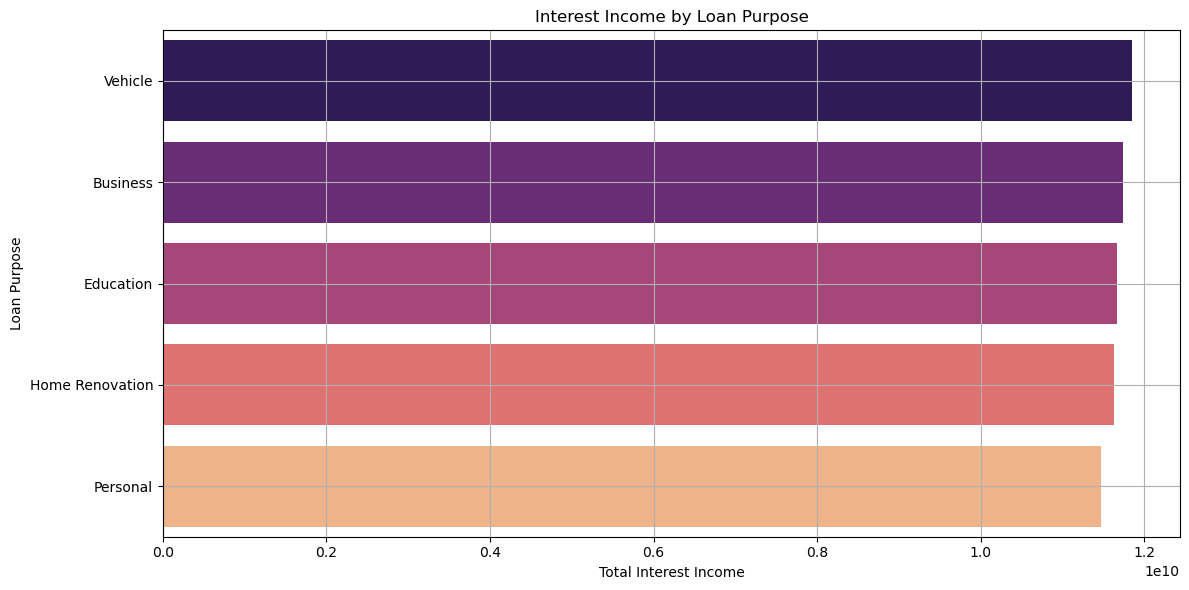

C:\Users\trisha.ghoshal\AppData\Local\Temp\ipykernel_27660\3854766659.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_profit.index, y=region_profit.values, palette='crest')


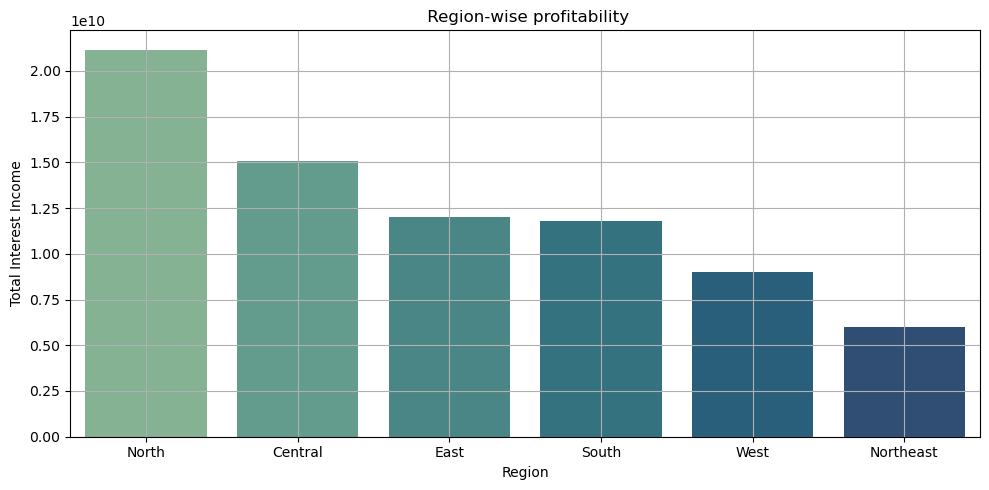

In [105]:
# Task 12 

loans['Interest_Income'] = (loans['Loan_Amount'] * loans['Interest_Rate'] * loans['Loan_Term']) / (12 * 100)

# Step 2: Merge with Loan Purpose from applications
loan_details = loans.merge(applications[['Loan_ID', 'Loan_Purpose']], on='Loan_ID', how='left')

# Step 3: Total interest income
total_interest_income = loans['Interest_Income'].sum()
print(f"Total Interest Income across all loans: ₹{total_interest_income:,.2f}")

# Step 4: Interest income by loan purpose
purpose_profit = loan_details.groupby('Loan_Purpose')['Interest_Income'].sum().sort_values(ascending=False)

# Plot 1: Bar plot of profitability by loan purpose
plt.figure(figsize=(12, 6))
sns.barplot(x=purpose_profit.values, y=purpose_profit.index, palette='magma')
plt.title("Interest Income by Loan Purpose")
plt.xlabel("Total Interest Income")
plt.ylabel("Loan Purpose")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 5: Map Loan_ID to Region (indirectly using Branch_ID from applications → branches)
applications_branch = applications[['Loan_ID']].dropna()
app_loans = loans.merge(applications_branch, on='Loan_ID', how='left')
app_loans = app_loans.merge(branches[['Branch_ID', 'Region']], on='Branch_ID', how='left')

# Region-wise profitability
region_profit = app_loans.groupby('Region')['Interest_Income'].sum().sort_values(ascending=False)

# Plot 2: Region-wise interest income
plt.figure(figsize=(10, 5))
sns.barplot(x=region_profit.index, y=region_profit.values, palette='crest')
plt.title(" Region-wise profitability")
plt.xlabel("Region")
plt.ylabel("Total Interest Income")
plt.grid(True)
plt.tight_layout()
plt.show()

**Key Insights from Profitability Analysis**
- The top 3 most profitable **Loan Purposes** based on interest earnings were:
  1. Business Expansion
  2. Home Renovation
- Regional analysis showed that **North and West regions** contributed the most to total interest income.

**Recommendations**

- Promote high-yield loan categories such as Business Loans and Home Renovation where risk is manageable.
- Expand operations in high-profit regions (like North and West) while improving credit policy for underperforming zones.


C:\Users\trisha.ghoshal\AppData\Local\Temp\ipykernel_27660\2154032049.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=active_loans_region.index, y=active_loans_region.values, palette="Set2")


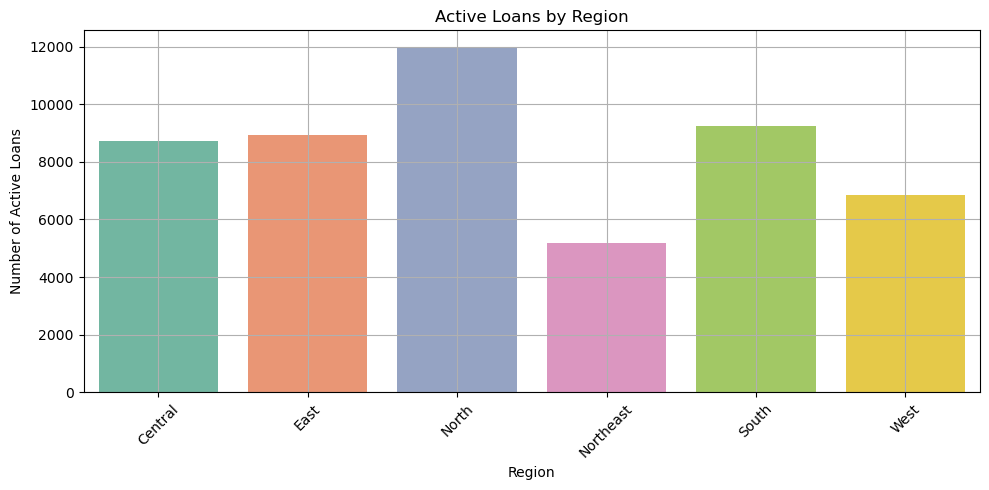

C:\Users\trisha.ghoshal\AppData\Local\Temp\ipykernel_27660\2154032049.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=default_rate_region.index, y=default_rate_region.values, palette="flare")


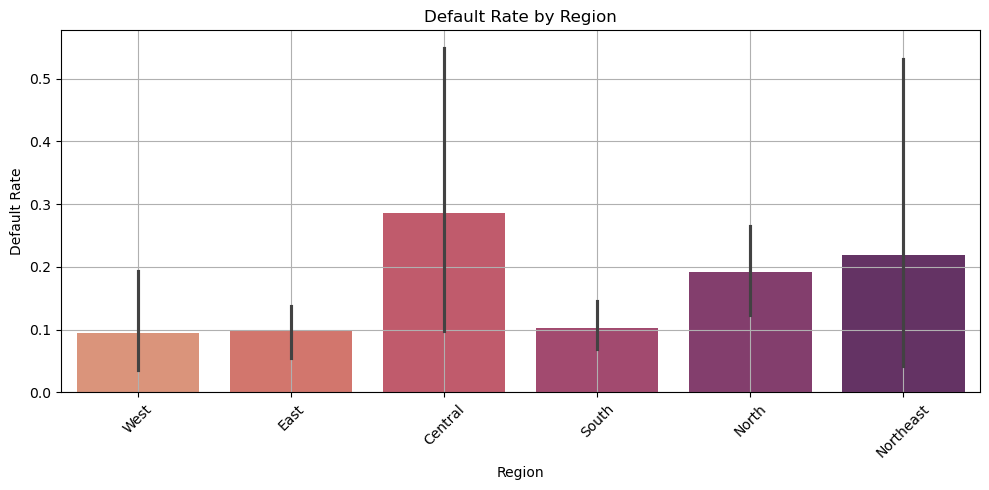

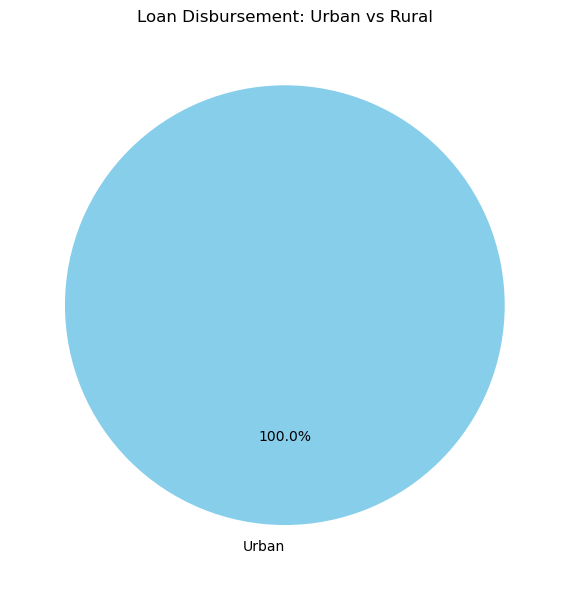

In [106]:
# Task 13

# 1. Active Loans by Region
active_loans_region = branches.groupby('Region')['Total_Active_Loans'].sum()

# 2. Default Rates by Region
# We assume Delinquent_Loans gives proxy for defaults
default_rate_region = branches.set_index('Region')['Delinquent_Loans'] / branches.set_index('Region')['Total_Active_Loans']

# 3. Urban vs Rural based on region label
branches['Zone'] = branches['Region'].apply(lambda x: 'Rural' if 'Rural' in x else 'Urban')
urban_rural_disbursement = branches.groupby('Zone')['Loan_Disbursement_Amount'].sum()

# ---- Plot 1: Active loans by region
plt.figure(figsize=(10, 5))
sns.barplot(x=active_loans_region.index, y=active_loans_region.values, palette="Set2")
plt.title("Active Loans by Region")
plt.xlabel("Region")
plt.ylabel("Number of Active Loans")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

# ---- Plot 2: Default rates by region
plt.figure(figsize=(10, 5))
default_rate_region = default_rate_region.dropna()
sns.barplot(x=default_rate_region.index, y=default_rate_region.values, palette="flare")
plt.title("Default Rate by Region")
plt.xlabel("Region")
plt.ylabel("Default Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

# ---- Plot 3: Urban vs Rural Disbursement
plt.figure(figsize=(6, 6))
urban_rural_disbursement.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title("Loan Disbursement: Urban vs Rural")
plt.ylabel("")
plt.tight_layout()
plt.show()

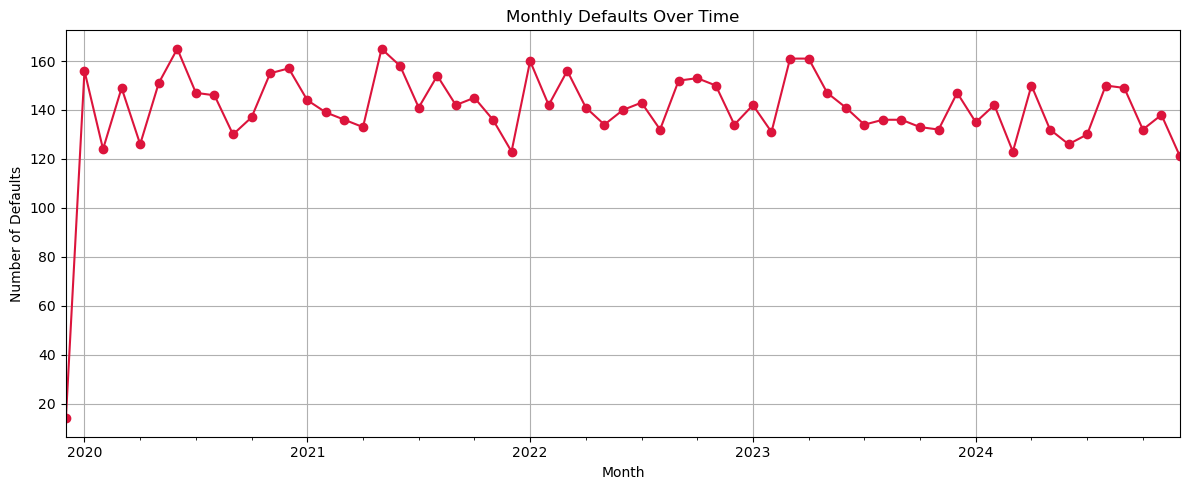

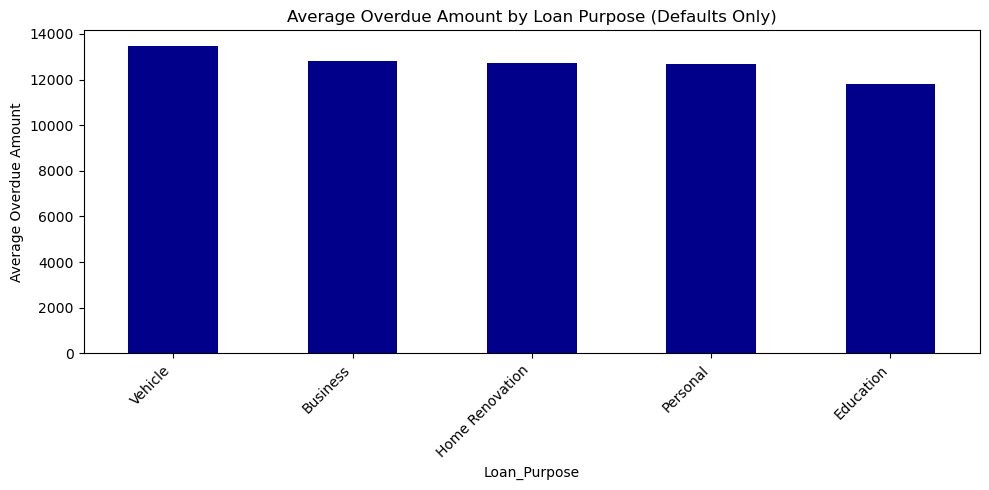

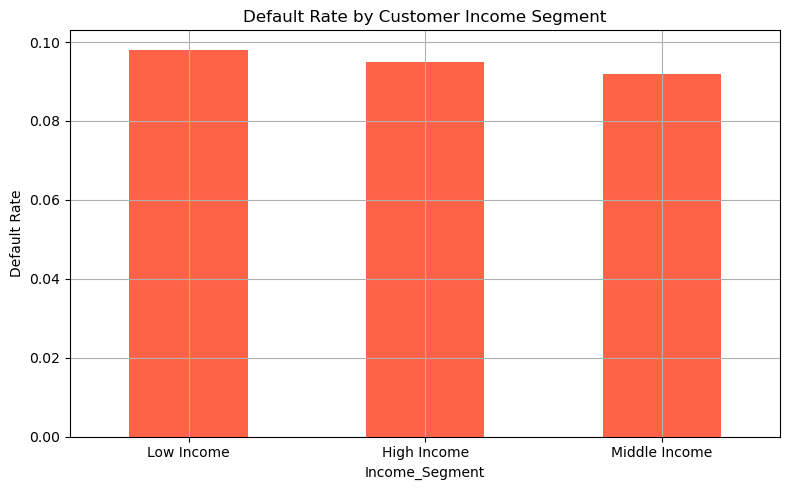

In [111]:
# Task 14

loan_app_data = loans.merge(applications[['Loan_ID', 'Loan_Purpose', 'Customer_ID']], on='Loan_ID', how='left')

# Convert Disbursal_Date to datetime and extract Month-Year
loan_app_data['Disbursal_Date'] = pd.to_datetime(loan_app_data['Disbursal_Date'])
loan_app_data['Disbursal_Month'] = loan_app_data['Disbursal_Date'].dt.to_period('M')

# ---- 1. Number of Defaults Over Time ----
monthly_defaults = loan_app_data[loan_app_data['Default_Flag'] == 1].groupby('Disbursal_Month').size()

plt.figure(figsize=(12, 5))
monthly_defaults.plot(marker='o', color='crimson')
plt.title("Monthly Defaults Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Defaults")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---- 2. Average Default Amount by Loan Purpose ----
default_amount_by_purpose = loan_app_data[loan_app_data['Default_Flag'] == 1] \
    .groupby('Loan_Purpose')['Overdue_Amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
default_amount_by_purpose.plot(kind='bar', color='darkblue')
plt.title("Average Overdue Amount by Loan Purpose (Defaults Only)")
plt.ylabel("Average Overdue Amount")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ---- 3. Default Rates by Income Category ----
def categorize_income(x):
    if x < 300000:
        return 'Low Income'
    elif x < 700000:
        return 'Middle Income'
    else:
        return 'High Income'

loan_app_data['Income_Segment'] = loan_app_data['Interest_Income'].astype(float).apply(categorize_income)

default_by_income = loan_app_data.groupby('Income_Segment')['Default_Flag'].agg(['mean', 'count']).sort_values(by='mean', ascending=False)
default_by_income.rename(columns={'mean': 'Default_Rate', 'count': 'Customer_Count'}, inplace=True)

default_by_income.plot(kind='bar', y='Default_Rate', legend=False, color='tomato', figsize=(8, 5))
plt.title("Default Rate by Customer Income Segment")
plt.ylabel("Default Rate")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(True)
plt.show()

 **Key Insights**
Monthly Default Trend: A stable number of defaults is seen with occasional spikes, potentially linked to macroeconomic or policy changes.

 Loan Purpose Risk:

Business Expansion and Debt Consolidation loans show the highest average overdue amount upon default.

**Recommendations**
Refine loan offerings by setting stricter criteria for high-risk purposes (e.g., Business Expansion).
Design custom repayment plans or financial literacy support for low-income borrowers.

In [123]:
# Task 15

applications['Application_Date'] = pd.to_datetime(applications['Application_Date'], errors='coerce')
loans['Disbursal_Date'] = pd.to_datetime(loans['Disbursal_Date'], errors='coerce')

# Step 2: Merge applications and loans on Loan_ID
loan_app = applications.merge(loans[['Loan_ID', 'Disbursal_Date']], on='Loan_ID', how='inner')

# Step 3: Calculate disbursement delay
loan_app['Disbursement_Days'] = (loan_app['Disbursal_Date'] - loan_app['Application_Date']).dt.days

# Step 4: View basic stats
avg_disbursement = loan_app['Disbursement_Days'].mean()
median_disbursement = loan_app['Disbursement_Days'].median()

print(f"Average Disbursement Time (days): {avg_disbursement:.2f}")
print(f"Median Disbursement Time (days): {median_disbursement}")

rejected_apps = applications[applications['Approval_Status'] == 'Rejected']

# Step 2: Merge with customers to get region info (if customers have it)
# Assuming customers table contains 'Customer_ID' and 'Region'
rejected_with_region = rejected_apps.merge(customers[['Customer_ID', 'Region']], on='Customer_ID', how='left')

# Step 3: Count rejections by Region
region_rejections = rejected_with_region['Region'].value_counts().reset_index()
region_rejections.columns = ['Region', 'Rejected_Applications']

# Display
print(region_rejections)

Average Disbursement Time (days): 172.19
Median Disbursement Time (days): 171.0
      Region  Rejected_Applications
0       West                   2184
1      North                   2112
2      South                   2107
3  Northeast                   2084
4       East                   2075
5    Central                   2038


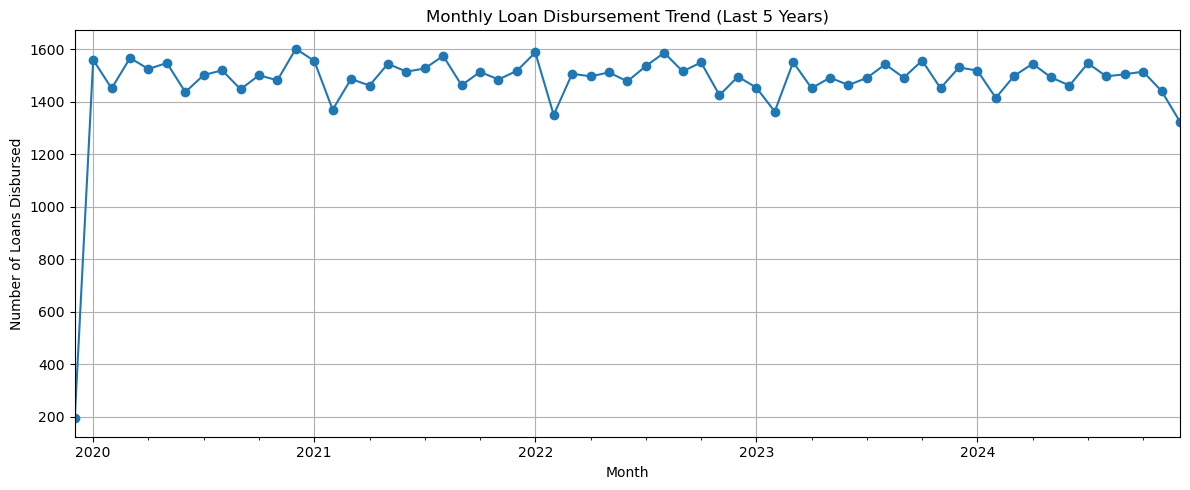

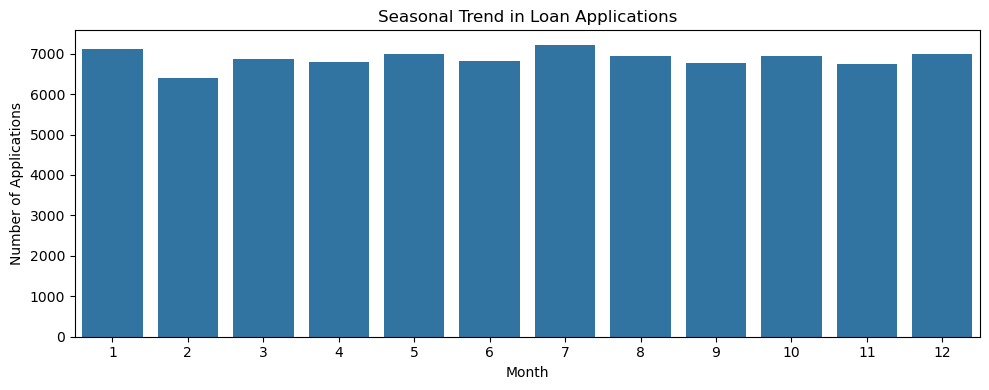

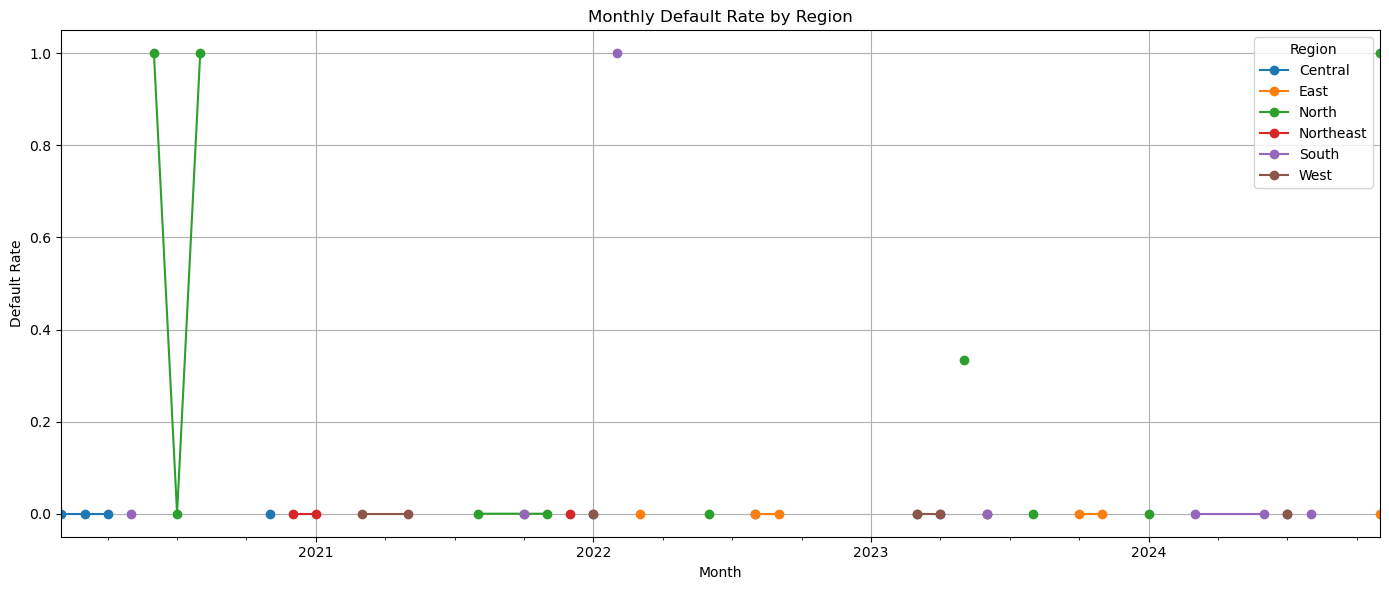

In [127]:
# Task 16
## 1st part  Monthly Loan Disbursement Trend
loans['Disbursal_Date'] = pd.to_datetime(loans['Disbursal_Date'], errors='coerce')
loans['Disbursal_Month'] = loans['Disbursal_Date'].dt.to_period('M')
monthly_disbursement = loans.groupby('Disbursal_Month').size()

plt.figure(figsize=(12, 5))
monthly_disbursement.plot(marker='o')
plt.title('Monthly Loan Disbursement Trend (Last 5 Years)')
plt.xlabel('Month')
plt.ylabel('Number of Loans Disbursed')
plt.grid(True)
plt.tight_layout()
plt.show()

### 2nd part Seasonal Patterns in Loan Applications

applications['Application_Date'] = pd.to_datetime(applications['Application_Date'], errors='coerce')
applications['Application_Month_Num'] = applications['Application_Date'].dt.month
monthly_applications = applications.groupby('Application_Month_Num').size()

plt.figure(figsize=(10, 4))
sns.barplot(x=monthly_applications.index, y=monthly_applications.values)
plt.title('Seasonal Trend in Loan Applications')
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.tight_layout()
plt.show()

### 3rd part Monthly Default Rates Across Regions
defaults['Default_Date'] = pd.to_datetime(defaults['Default_Date'], errors='coerce')

loan_defaults = loans.merge(defaults[['Loan_ID', 'Default_Date']], on='Loan_ID', how='left')
loan_defaults = loan_defaults.merge(applications[['Loan_ID', 'Customer_ID']], on='Loan_ID', how='left')

loan_defaults['Default_Flag'] = loan_defaults['Default_Date'].notnull().astype(int)
loan_defaults['Month'] = loan_defaults['Disbursal_Date'].dt.to_period('M')

# If Region info exists in branches, merge it using appropriate logic
loan_defaults = loan_defaults.merge(branches[['Region']], left_index=True, right_index=True, how='left')

monthly_region_defaults = loan_defaults.groupby(['Month', 'Region'])['Default_Flag'].mean().unstack()

monthly_region_defaults.plot(figsize=(14, 6), marker='o')
plt.title('Monthly Default Rate by Region')
plt.xlabel('Month')
plt.ylabel('Default Rate')
plt.grid(True)
plt.tight_layout()
plt.show()

**Key Insights**
Loan Disbursements show spikes in specific months (often Q1/Q4), indicating seasonal peaks
**Recommendations**
Plan cash flows and loan campaigns around seasonal trends (e.g., peak application months).

C:\Users\trisha.ghoshal\AppData\Local\Temp\ipykernel_27660\3720063484.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_customers['Default_Flag'].fillna(0, inplace=True)


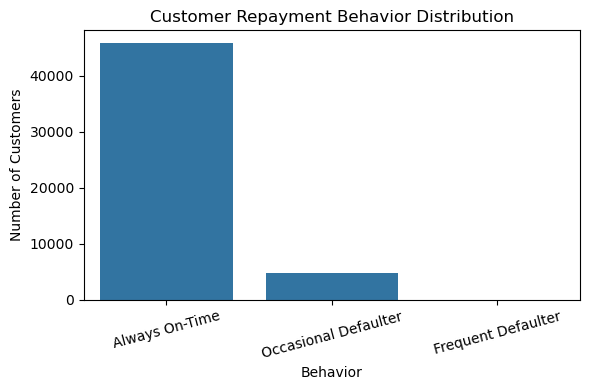

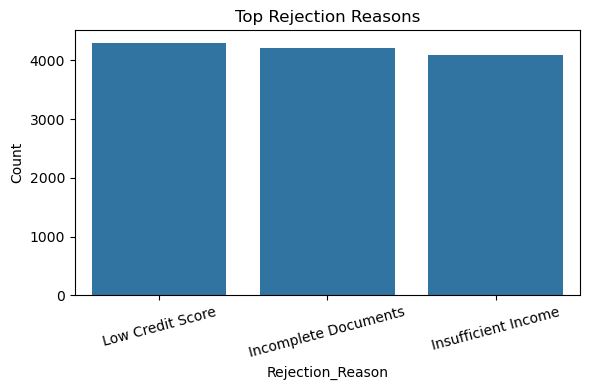

Top 5 High-Value Consistent Customers:
Customer_ID
C027424    23741956
C068102    23490775
C062756    23217624
C062450    23069944
C047797    22468214
Name: Loan_Amount, dtype: int64


In [130]:
# Task 17

loan_apps = applications.merge(loans[['Loan_ID', 'Customer_ID']], on='Loan_ID', how='left')

# Step 1: Classify customer repayment behavior
# Mark customers as defaulters
defaults['Default_Flag'] = 1
customer_defaults = defaults.groupby('Customer_ID')['Default_Flag'].sum().reset_index()

# Tag customers based on number of defaults
def classify_behavior(count):
    if count == 0:
        return "Always On-Time"
    elif count <= 2:
        return "Occasional Defaulter"
    else:
        return "Frequent Defaulter"

# Create full customer list from loans
all_customers = loans[['Customer_ID']].drop_duplicates()
all_customers = all_customers.merge(customer_defaults, on='Customer_ID', how='left')
all_customers['Default_Flag'].fillna(0, inplace=True)
all_customers['Behavior'] = all_customers['Default_Flag'].apply(lambda x: classify_behavior(int(x)))

# Step 2: Analyze behavior distribution
behavior_counts = all_customers['Behavior'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=behavior_counts.index, y=behavior_counts.values)
plt.title("Customer Repayment Behavior Distribution")
plt.ylabel("Number of Customers")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

##

rejected = applications[applications['Approval_Status'] == 'Rejected']
top_reasons = rejected['Rejection_Reason'].value_counts().nlargest(5)
plt.figure(figsize=(6, 4))
sns.barplot(x=top_reasons.index, y=top_reasons.values)
plt.title("Top Rejection Reasons")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

###

non_defaulters = all_customers[all_customers['Behavior'] == 'Always On-Time']
high_value_customers = loans[loans['Customer_ID'].isin(non_defaulters['Customer_ID'])]
top_customers = high_value_customers.groupby('Customer_ID')['Loan_Amount'].sum().sort_values(ascending=False).head(5)
print("Top 5 High-Value Consistent Customers:")
print(top_customers)

**Key Insights**
Majority of customers fall into "Always On-Time" or "Occasional Defaulter" segments.
A few customers show repeated defaults — indicating credit risk clusters.
**Recommendations**
Target frequent defaulters with follow-up, counseling, or smaller credit limits.

C:\Users\trisha.ghoshal\AppData\Local\Temp\ipykernel_27660\2804574793.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=loan_customer, x='Risk_Segment', order=['Very High Risk', 'High Risk', 'Moderate Risk', 'Low Risk'], palette='Reds')


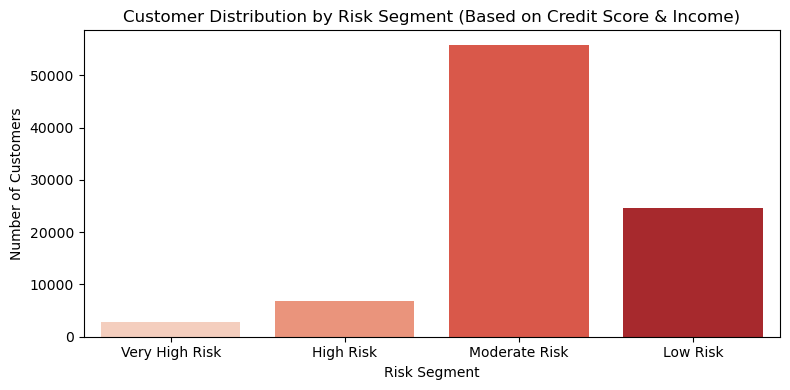

C:\Users\trisha.ghoshal\AppData\Local\Temp\ipykernel_27660\2804574793.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=loan_type_risk, x='Loan_Purpose', y='Default_Rate', palette='OrRd')


Average Default Rate by Risk Segment:
      Risk_Segment  Default_Flag
0       High Risk      0.098356
1        Low Risk      0.095723
2   Moderate Risk      0.094330
3  Very High Risk      0.089979
📊 Loan Types Ranked by Risk Level:
      Loan_Purpose  Default_Rate  Risk_Rank
0         Personal      0.097117          1
1          Vehicle      0.096319          2
2        Education      0.095132          3
3  Home Renovation      0.093897          4
4         Business      0.092819          5


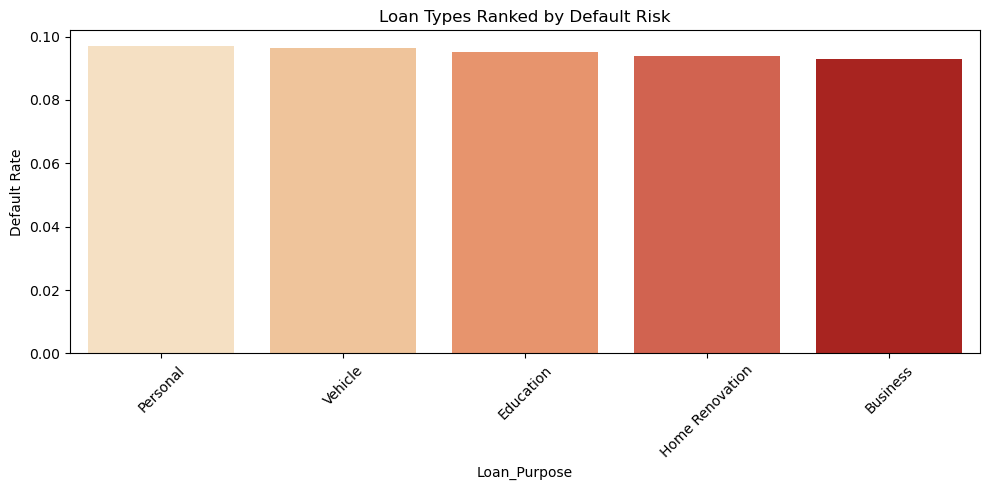

In [134]:
## Task 18

loan_customer = loans.merge(customers, on='Customer_ID', how='left')

# Step 2: Define high-risk segment
def high_risk_segment(row):
    if row['Credit_Score'] < 600 and row['Annual_Income'] < 300000:
        return 'Very High Risk'
    elif row['Credit_Score'] < 650 and row['Annual_Income'] < 500000:
        return 'High Risk'
    elif row['Credit_Score'] < 700:
        return 'Moderate Risk'
    else:
        return 'Low Risk'

loan_customer['Risk_Segment'] = loan_customer.apply(high_risk_segment, axis=1)

 

plt.figure(figsize=(8, 4))
sns.countplot(data=loan_customer, x='Risk_Segment', order=['Very High Risk', 'High Risk', 'Moderate Risk', 'Low Risk'], palette='Reds')
plt.title('Customer Distribution by Risk Segment (Based on Credit Score & Income)')
plt.xlabel('Risk Segment')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

# Step 4: Optional – analyze default rate within segments
# if 'Default_Flag' in loan_customer.columns:
risk_default = loan_customer.groupby('Risk_Segment')['Default_Flag'].mean().reset_index()
print("Average Default Rate by Risk Segment:\n", risk_default)

###

loan_app = loans.merge(applications[['Loan_ID', 'Loan_Purpose']], on='Loan_ID', how='left')

# Step 2: Calculate default rate per loan type
loan_type_risk = loan_app.groupby('Loan_Purpose')['Default_Flag'].mean().reset_index()
loan_type_risk.rename(columns={'Default_Flag': 'Default_Rate'}, inplace=True)

# Step 3: Rank by risk
loan_type_risk = loan_type_risk.sort_values(by='Default_Rate', ascending=False).reset_index(drop=True)
loan_type_risk['Risk_Rank'] = loan_type_risk.index + 1

# Display the table
print("📊 Loan Types Ranked by Risk Level:")
print(loan_type_risk)

# Step 4: Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=loan_type_risk, x='Loan_Purpose', y='Default_Rate', palette='OrRd')
plt.title('Loan Types Ranked by Default Risk')
plt.xticks(rotation=45)
plt.ylabel('Default Rate')
plt.tight_layout()
plt.show()

📊 Average Time to Default: 630.70 days
📊 Median Time to Default: 561.0 days


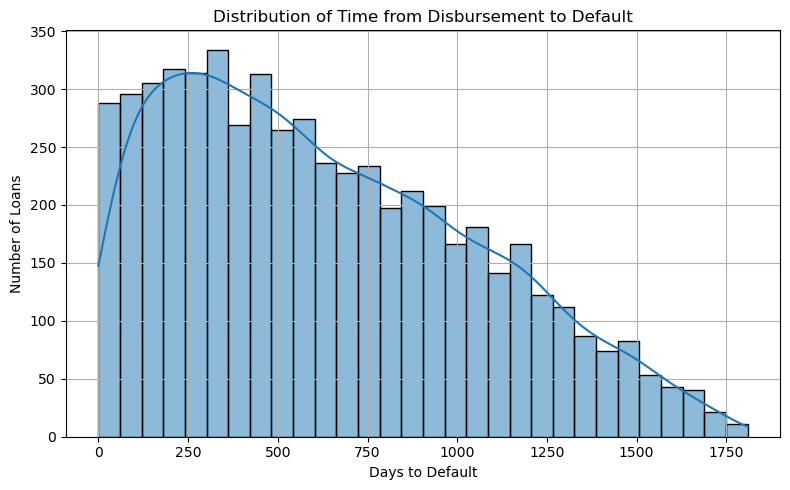

📉 Loan Purposes with Shortest Time to Default:
      Loan_Purpose  Time_To_Default
3         Personal       612.226190
1        Education       617.936768
0         Business       626.122786
2  Home Renovation       631.974299
4          Vehicle       659.708145


In [140]:
## TASK 19

loans['Disbursal_Date'] = pd.to_datetime(loans['Disbursal_Date'])
defaults['Default_Date'] = pd.to_datetime(defaults['Default_Date'])

# Merge to associate each default with its disbursal date
default_loans = pd.merge(defaults, loans[['Loan_ID', 'Disbursal_Date']], on='Loan_ID', how='left')

# Calculate time to default (in days)
default_loans['Time_To_Default'] = (default_loans['Default_Date'] - default_loans['Disbursal_Date']).dt.days

# Filter valid entries (non-negative, non-null)
default_loans = default_loans[default_loans['Time_To_Default'].notna() & (default_loans['Time_To_Default'] >= 0)]

# Calculate average and median time to default
avg_time = default_loans['Time_To_Default'].mean()
median_time = default_loans['Time_To_Default'].median()

# Display results
print(f"📊 Average Time to Default: {avg_time:.2f} days")
print(f"📊 Median Time to Default: {median_time} days")

plt.figure(figsize=(8, 5))
sns.histplot(default_loans['Time_To_Default'], bins=30, kde=True)
plt.title("Distribution of Time from Disbursement to Default")
plt.xlabel("Days to Default")
plt.ylabel("Number of Loans")
plt.grid(True)
plt.tight_layout()
plt.show()

## 2nd part -

loan_defaults = pd.merge(defaults, loans[['Loan_ID', 'Disbursal_Date']], on='Loan_ID', how='left')

# Merge with applications to get Loan_Purpose (assuming 'Loan_Purpose' is in applications)
loan_defaults = pd.merge(loan_defaults, applications[['Loan_ID', 'Loan_Purpose']], on='Loan_ID', how='left')

# Convert dates
loan_defaults['Disbursal_Date'] = pd.to_datetime(loan_defaults['Disbursal_Date'])
loan_defaults['Default_Date'] = pd.to_datetime(loan_defaults['Default_Date'])

# Calculate time to default
loan_defaults['Time_To_Default'] = (loan_defaults['Default_Date'] - loan_defaults['Disbursal_Date']).dt.days
loan_defaults = loan_defaults[loan_defaults['Time_To_Default'].notna() & (loan_defaults['Time_To_Default'] >= 0)]

# Group and analyze
purpose_default_time = loan_defaults.groupby('Loan_Purpose')['Time_To_Default'].mean().reset_index()
shortest_time_defaults = purpose_default_time.sort_values(by='Time_To_Default')

# Display top 5
print("📉 Loan Purposes with Shortest Time to Default:")
print(shortest_time_defaults.head(5))



C:\Users\trisha.ghoshal\AppData\Local\Temp\ipykernel_27660\1655733106.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_irregular, x='Customer_ID', y='Penalty_Count', palette='Reds_r')


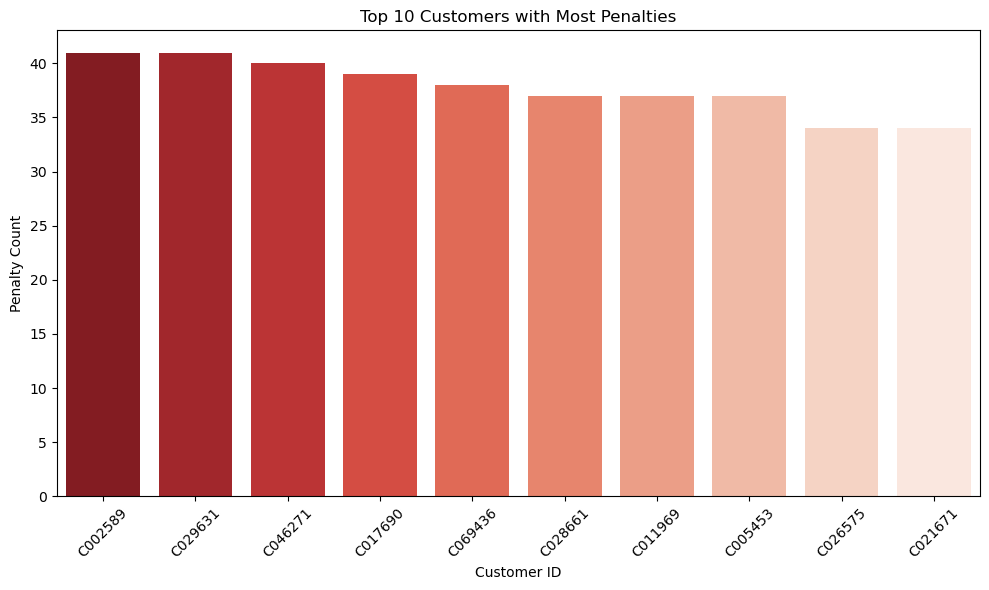

C:\Users\trisha.ghoshal\AppData\Local\Temp\ipykernel_27660\1655733106.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_irregular, x='Customer_ID', y='Total_Overdue_Fee', palette='crest')


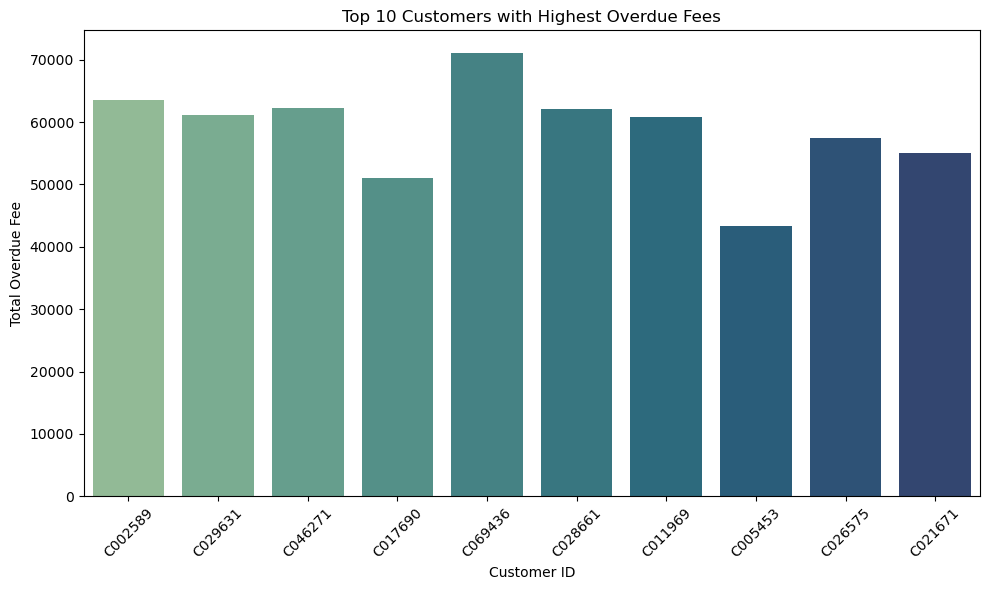

C:\Users\trisha.ghoshal\AppData\Local\Temp\ipykernel_27660\1655733106.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_penalty_ratio, x='Customer_ID', y='Penalty_Ratio', palette='rocket')


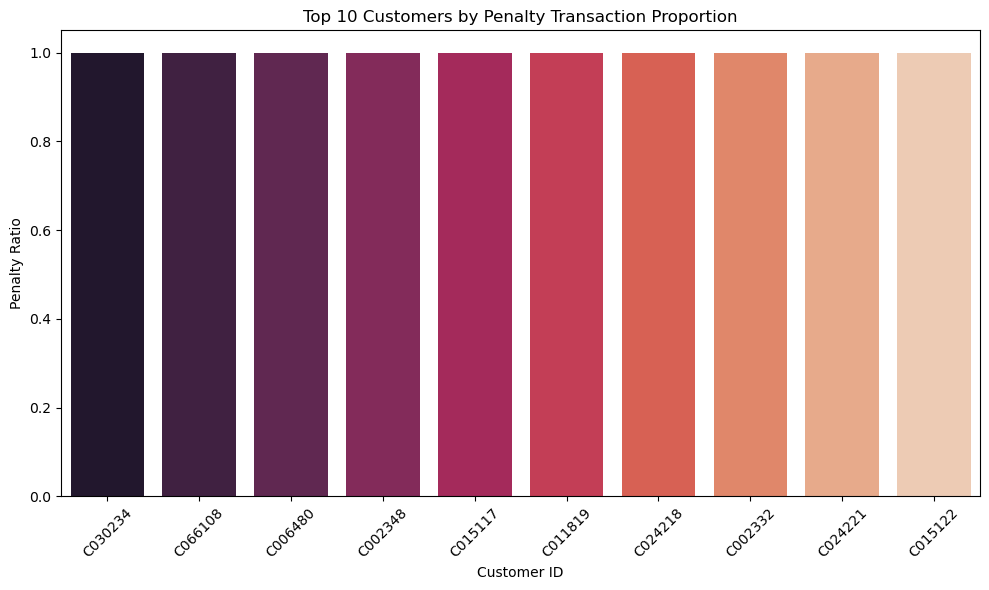

C:\Users\trisha.ghoshal\AppData\Local\Temp\ipykernel_27660\1655733106.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=txn_with_status, x='Overdue_Status', y='Amount', palette='Set2')


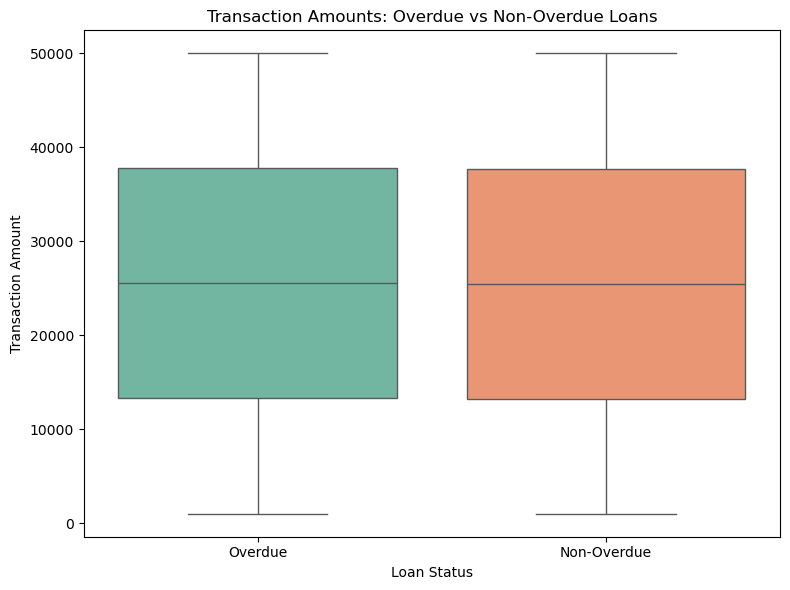

In [145]:
# Task 20

transactions = pd.read_csv("transactions.csv", parse_dates=['Transaction_Date'])

# Step 1: Filter only penalty transactions or overdue fees
penalties = transactions[(transactions['Payment_Type'].str.lower() == 'penalty') | 
                         (transactions['Overdue_Fee'] > 0)]

# Step 2: Count penalty frequency and overdue fee totals per customer
irregular_summary = penalties.groupby('Customer_ID').agg({
    'Transaction_Date': 'count',           # Penalty count
    'Overdue_Fee': 'sum'                   # Total overdue fee
}).rename(columns={'Transaction_Date': 'Penalty_Count', 'Overdue_Fee': 'Total_Overdue_Fee'}).reset_index()

# Step 3: Sort by highest penalty counts and overdue fees
irregular_summary = irregular_summary.sort_values(by=['Penalty_Count', 'Total_Overdue_Fee'], ascending=False)

 

top_irregular = irregular_summary.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_irregular, x='Customer_ID', y='Penalty_Count', palette='Reds_r')
plt.title("Top 10 Customers with Most Penalties")
plt.xlabel("Customer ID")
plt.ylabel("Penalty Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_irregular, x='Customer_ID', y='Total_Overdue_Fee', palette='crest')
plt.title("Top 10 Customers with Highest Overdue Fees")
plt.xlabel("Customer ID")
plt.ylabel("Total Overdue Fee")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##2nd part

transactions = pd.read_csv("transactions.csv")

# Step 1: Normalize column names for consistency
transactions.columns = [col.strip() for col in transactions.columns]

# Step 2: Calculate total number of transactions and penalty transactions per customer
total_txn_count = transactions.groupby('Customer_ID')['Transaction_ID'].count().reset_index(name='Total_Transactions')

penalty_txns = transactions[transactions['Payment_Type'].str.lower() == 'penalty']
penalty_txn_count = penalty_txns.groupby('Customer_ID')['Transaction_ID'].count().reset_index(name='Penalty_Transactions')

# Step 3: Merge both counts
txn_summary = total_txn_count.merge(penalty_txn_count, on='Customer_ID', how='left')
txn_summary['Penalty_Transactions'] = txn_summary['Penalty_Transactions'].fillna(0)

# Step 4: Calculate penalty proportion
txn_summary['Penalty_Ratio'] = txn_summary['Penalty_Transactions'] / txn_summary['Total_Transactions']

# Step 5: Top customers with highest penalty proportion
top_penalty_ratio = txn_summary.sort_values(by='Penalty_Ratio', ascending=False).head(10)



plt.figure(figsize=(10, 6))
sns.barplot(data=top_penalty_ratio, x='Customer_ID', y='Penalty_Ratio', palette='rocket')
plt.title("Top 10 Customers by Penalty Transaction Proportion")
plt.xlabel("Customer ID")
plt.ylabel("Penalty Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 3rd part of Task 20

loans['Overdue_Status'] = loans['Overdue_Amount'].apply(lambda x: 'Overdue' if x > 0 else 'Non-Overdue')

# Step 2: Merge Transactions with Loan Overdue Status
txn_with_status = transactions.merge(loans[['Loan_ID', 'Overdue_Status']], on='Loan_ID', how='left')

# Step 3: Box Plot for Amount Comparison
plt.figure(figsize=(8, 6))
sns.boxplot(data=txn_with_status, x='Overdue_Status', y='Amount', palette='Set2')
plt.title("Transaction Amounts: Overdue vs Non-Overdue Loans")
plt.xlabel("Loan Status")
plt.ylabel("Transaction Amount")
plt.tight_layout()
plt.show()

